In [77]:
import sys
!{sys.executable} -m pip install plotly

In [78]:
import sys
!{sys.executable} -m pip install missingno

In [81]:
import sys
!{sys.executable} -m pip install sklearn.cross_validation 

ERROR: Could not find a version that satisfies the requirement sklearn.cross_validation (from versions: none)
ERROR: No matching distribution found for sklearn.cross_validation


In [80]:
import sys
!{sys.executable} -m pip install --upgrade pip

In [84]:
import sys
!{sys.executable} -m pip install chart_studio

In [85]:
import sys
!{sys.executable} -m pip install plotly

In [86]:
import sys
!{sys.executable} -m pip install missingno

In [89]:
import math
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib.pyplot import pie, axis, show
from matplotlib import pyplot as plt
from matplotlib import cm as cm
%matplotlib inline


import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import svm

import missingno as msno

import chart_studio.plotly as py
import chart_studio.graph_objs as go

ModuleNotFoundError: No module named 'chart_studio.graph_objs'

In [90]:
import sys
!{sys.executable} -m pip install chart_studio

In [91]:
import math
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib.pyplot import pie, axis, show
from matplotlib import pyplot as plt
from matplotlib import cm as cm
%matplotlib inline


import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import svm

import missingno as msno

import chart_studio.plotly as py
import plotly.graph_objs as go

In [92]:
df = pd.read_csv('./distorted_data_extra_field.csv', sep=',')

In [93]:
len(df)

4238

In [94]:
df.drop(df.columns[[0]], axis=1, inplace=True)

In [95]:
df.columns

Index(['destinationCountry', 'roomCount', 'udid', 'email', 'phone',
       'guest_country_code', 'is_cardless', 'stars', 'type',
       'NormalizedTotalBookingPrice', 'NormalizedLowRate',
       'numberOfBookedNights', 'numberOfReviews', 'AvgUserRating', 'hotel_id',
       'hasSpecialRequest', 'hasFreeCancellation', 'cancelledOrNoShow',
       'is_internal'],
      dtype='object')

In [96]:
df.head()


,destinationCountry,roomCount,udid,email,phone,guest_country_code,is_cardless,stars,type,NormalizedTotalBookingPrice,NormalizedLowRate,numberOfBookedNights,numberOfReviews,AvgUserRating,hotel_id,hasSpecialRequest,hasFreeCancellation,cancelledOrNoShow,is_internal
0,0,1.0,0,0,0,0,0,4.0,HOTEL,229.0,166.0,1,103.0,3.9643,0,0,1,0,1
1,1,2.0,1,1,1,0,0,1.0,HOTEL,126.0,90.0,2,10.0,1.0000,1,0,0,1,0
2,2,1.0,2,2,2,0,0,5.0,HOTEL,1722.0,753.0,4,25.0,3.8000,2,1,0,1,0
3,0,1.0,3,3,3,1,0,3.5,UNKNOWN,685.0,373.0,2,16.0,3.6000,3,0,0,0,0
4,2,1.0,0,4,4,2,0,5.0,HOTEL,427.0,401.0,1,10.0,5.0000,4,0,0,0,1


In [9]:
len(df)

4238

In [97]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
destinationCountry,4238.0,5.357480,7.891933,0.0,0.0000,2.000,8.0000,57.0
roomCount,4238.0,1.221095,0.635255,0.0,1.0000,1.000,1.0000,13.0
udid,4238.0,862.870694,862.418205,0.0,0.0000,640.500,1602.7500,2625.0
email,4238.0,1453.201982,1079.400480,0.0,440.2500,1387.500,2391.7500,3425.0
phone,4238.0,1934.479471,1151.241212,0.0,926.2500,1908.500,2927.7500,3971.0
guest_country_code,4238.0,3.039169,6.078425,0.0,0.0000,0.000,3.0000,50.0
is_cardless,4238.0,0.100047,0.300098,0.0,0.0000,0.000,0.0000,1.0
stars,4238.0,3.569962,1.413505,0.0,3.0000,4.000,4.5000,5.0
NormalizedTotalBookingPrice,4238.0,23992.322794,482250.391588,77.0,326.0000,713.000,1648.7500,25700521.0
NormalizedLowRate,4238.0,7123.140396,97182.274956,77.0,203.0000,373.000,615.0000,2655754.0


In [11]:
df.isnull().values.sum()

0

<AxesSubplot:>

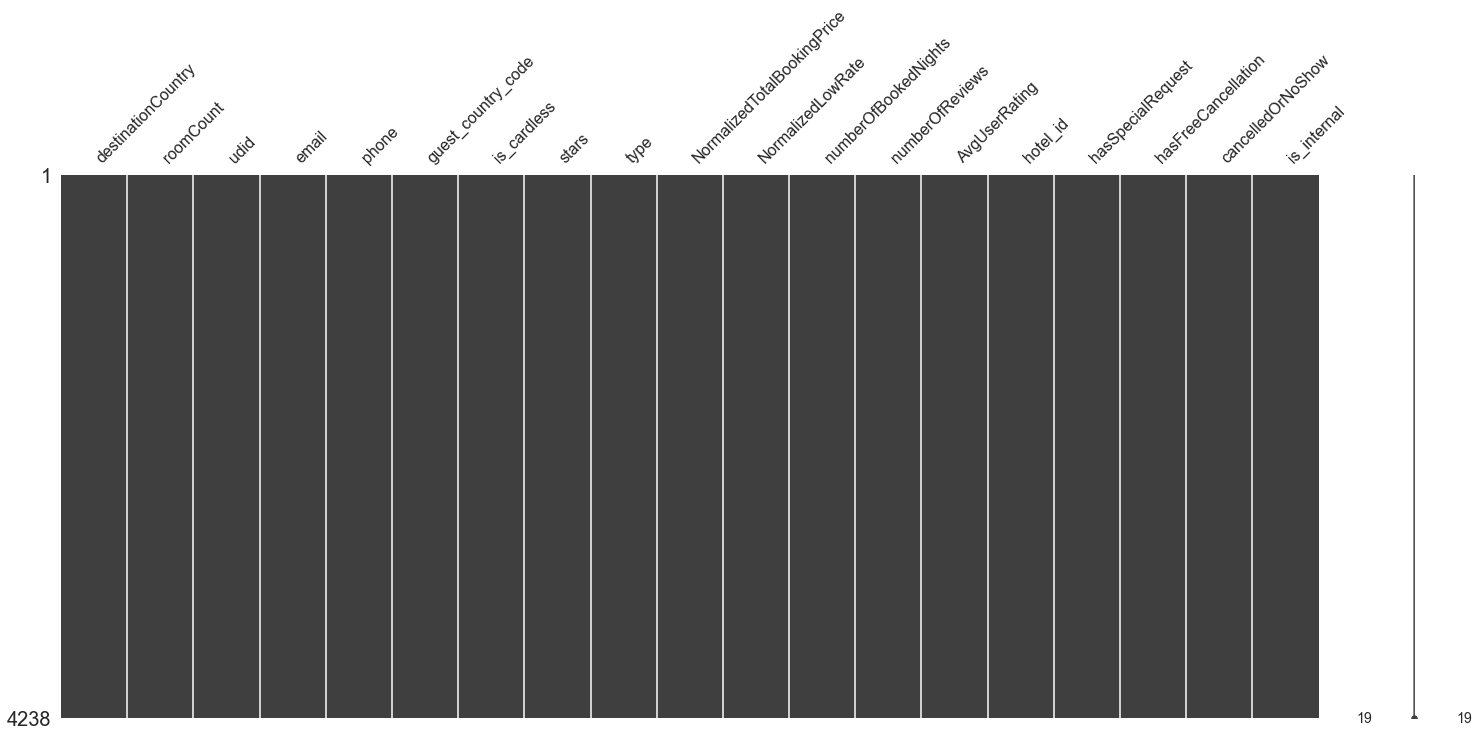

In [98]:
msno.matrix(df)

In [99]:
def fillNA(data):
    data = np.array(data)
    toFloat = [float(floatValue) for floatValue in data]       #Convert to float
    biggestId = np.max(toFloat)                                #Find biggest id available (to avoid overlapping)
    print("Max id number available =", biggestId)
    
    for i in range (len(data)):
        if float(data[i]) == 0:
            data[i] = biggestId   
            biggestId = biggestId +1                           #Increment ID value
    return data

In [100]:
#Fill UDID missing data with correct values
udid = fillNA(df['udid'])
#df['udid'] = udid

Max id number available = 2625.0


In [101]:
#Check number of missing values after cleaning
df.fillna(0, inplace=True)

In [10]:
nullRooms         = df.loc[df['roomCount']            <= 0 ]
noReviews         = df.loc[df['numberOfReviews']      <= 0 ]
noNights          = df.loc[df['numberOfBookedNights'] <= 0 ]
noNights          = df.loc[df['numberOfBookedNights'] <= 0 ]
avgRating         = df.loc[df['AvgUserRating']        == 0 ]


print("Number of hotels with no reviews =",len(noReviews))
print("\nNumber of orders with no nights  =",len(noNights))
print('Number of orders with no rooms   =', len(nullRooms))


nullRooms.head()

Number of hotels with no reviews = 0

Number of orders with no nights  = 0
Number of orders with no rooms   = 3


,Unnamed: 0,destinationCountry,roomCount,udid,email,phone,guest_country_code,is_cardless,stars,type,NormalizedTotalBookingPrice,NormalizedLowRate,numberOfBookedNights,numberOfReviews,AvgUserRating,hotel_id,hasSpecialRequest,hasFreeCancellation,cancelledOrNoShow,is_internal
1865,1865,8,0.0,0,1558,1794,0,0,4.0,HOTEL,1059.0,228.0,6,10.0,5.0000,1042,0,0,1,0
2084,2084,2,0.0,1347,1735,1991,0,0,4.0,HOTEL,8795.0,718.0,9,35.0,2.9375,1116,0,0,1,0
2620,2620,10,0.0,0,2179,2495,0,0,5.0,HOTEL,5433.0,1088.0,9,13.0,4.3333,337,0,0,0,0


In [102]:
indexes_to_drop = df[df['roomCount'] == 0].index.tolist()
df.drop(df.index[indexes_to_drop], inplace=True)

In [103]:
nullRooms = df.loc[df['roomCount'] == 0 ]

print('Number of orders with no rooms   =', len(nullRooms))

Number of orders with no rooms   = 0


In [14]:
df['AvgUserRating'] = np.round(df['AvgUserRating'], decimals=0)
df['AvgUserRating'].head()

df['stars'] = np.round(df['stars'], decimals=0)
df['stars'][:20]

0     4.0
1     1.0
2     5.0
3     4.0
4     5.0
5     3.0
6     0.0
7     0.0
8     3.0
9     4.0
10    4.0
11    5.0
12    4.0
13    4.0
14    4.0
15    5.0
16    5.0
17    4.0
18    3.0
19    4.0
Name: stars, dtype: float64

In [104]:
cancelled = df.loc[df['cancelledOrNoShow'] == 1]
print(len(cancelled) / len(df) * 100)

32.585596221959854


In [105]:

print(df.isnull().values.sum())

0


In [106]:
def add_trip_type(df):
    is_internal = []
    count_same =0
    for i in range (len(df)):
        if (df['destinationCountry'][i] == df['guest_country_code'][i]):
            #print("\nSame\nDestination Country=", df['destinationCountry'][i], "\nSource Country     =", df['guest_country_code'][i])
            count_same += 1
            is_internal.append(1)
        else:
            is_internal.append(0)
    print(count_same/len(df) * 100)
    #return is_internal


In [24]:
#add_trip_type(df)

In [107]:
destination = df[['destinationCountry', 'cancelledOrNoShow']].groupby(['destinationCountry'], as_index=False).mean().sort_values(by='cancelledOrNoShow', ascending=False)
destination[:20]

,destinationCountry,cancelledOrNoShow
49,49,1.000000
33,33,0.666667
38,38,0.666667
25,25,0.555556
28,28,0.500000
32,32,0.500000
20,20,0.428571
14,14,0.425000
53,53,0.400000
7,7,0.392857


In [108]:
source = df[['guest_country_code', 'cancelledOrNoShow']].groupby(['guest_country_code'], as_index=False).mean().sort_values(by='cancelledOrNoShow', ascending=False)
source[:20]

,guest_country_code,cancelledOrNoShow
32,32,1.000000
49,49,1.000000
48,48,1.000000
47,47,1.000000
46,46,1.000000
41,41,1.000000
38,38,1.000000
25,25,0.615385
24,24,0.500000
27,27,0.500000


In [27]:
property_type = df[['type', 'cancelledOrNoShow']].groupby(['type'], as_index=False).mean().sort_values(by='cancelledOrNoShow', ascending=False)
property_type[:20]

,type,cancelledOrNoShow
18,YAMSAFER_HOMES,1.000000
12,PENSION,1.000000
6,HOSTEL,1.000000
10,INN,0.571429
7,HOSTEL_BACKPACKER_ACCOMMODATION,0.555556
15,SUITE,0.478261
1,APARTMENT,0.454545
0,ALL_INCLUSIVE,0.416667
13,RESIDENCE,0.375000
17,VILLA,0.352941


In [28]:
reviews_number = df[['AvgUserRating', 'cancelledOrNoShow']].groupby(['AvgUserRating'], as_index=False).mean().sort_values(by='cancelledOrNoShow', ascending=False)
reviews_number

,AvgUserRating,cancelledOrNoShow
3,3.0,0.357955
0,0.0,0.357016
4,4.0,0.306306
1,1.0,0.297297
2,2.0,0.289116
5,5.0,0.251082


In [109]:
property_type = df[['stars', 'cancelledOrNoShow']].groupby(['stars'], as_index=False).mean().sort_values(by='cancelledOrNoShow', ascending=False)
property_type

,stars,cancelledOrNoShow
0,0.0,0.471178
2,2.0,0.380531
7,4.5,0.368421
1,1.0,0.355556
4,3.0,0.352736
3,2.5,0.333333
6,4.0,0.316870
5,3.5,0.274336
8,5.0,0.256925


In [30]:
property_type = df[['hasSpecialRequest', 'cancelledOrNoShow']].groupby(['hasSpecialRequest'], as_index=False).mean().sort_values(by='cancelledOrNoShow', ascending=False)
property_type

,hasSpecialRequest,cancelledOrNoShow
0,0,0.329802
1,1,0.299639


In [31]:
property_type = df[['hasFreeCancellation', 'cancelledOrNoShow']].groupby(['hasFreeCancellation'], as_index=False).mean().sort_values(by='cancelledOrNoShow', ascending=False)
property_type[:20]

,hasFreeCancellation,cancelledOrNoShow
1,1,0.408644
0,0,0.299658


In [32]:
property_type = df[['is_internal', 'cancelledOrNoShow']].groupby(['is_internal'], as_index=False).mean().sort_values(by='cancelledOrNoShow', ascending=False)
property_type[:20]

,is_internal,cancelledOrNoShow
1,1,0.345885
0,0,0.310185


In [33]:
property_type = df[['is_cardless', 'cancelledOrNoShow']].groupby(['is_cardless'], as_index=False).mean().sort_values(by='cancelledOrNoShow', ascending=False)
property_type[:20]

,is_cardless,cancelledOrNoShow
1,1,0.471698
0,0,0.309630


In [34]:
property_type = df[['numberOfBookedNights', 'cancelledOrNoShow']].groupby(['numberOfBookedNights'], as_index=False).mean().sort_values(by='cancelledOrNoShow', ascending=False)
property_type[:30]

,numberOfBookedNights,cancelledOrNoShow
30,31,1.000000
23,24,1.000000
28,29,1.000000
21,22,1.000000
29,30,1.000000
19,20,1.000000
18,19,1.000000
26,27,1.000000
16,17,0.666667
12,13,0.666667


In [110]:
property_type = df[['roomCount', 'cancelledOrNoShow']].groupby(['roomCount'], as_index=False).mean().sort_values(by='cancelledOrNoShow', ascending=False)
property_type[:30]

,roomCount,cancelledOrNoShow
8,10.0,1.000000
6,7.0,0.750000
5,6.0,0.666667
7,8.0,0.400000
2,3.0,0.329268
0,1.0,0.328981
1,2.0,0.304940
3,4.0,0.272727
4,5.0,0.142857
9,13.0,0.000000


In [111]:
cancelled_orders = df.loc[df['cancelledOrNoShow'] == 1]

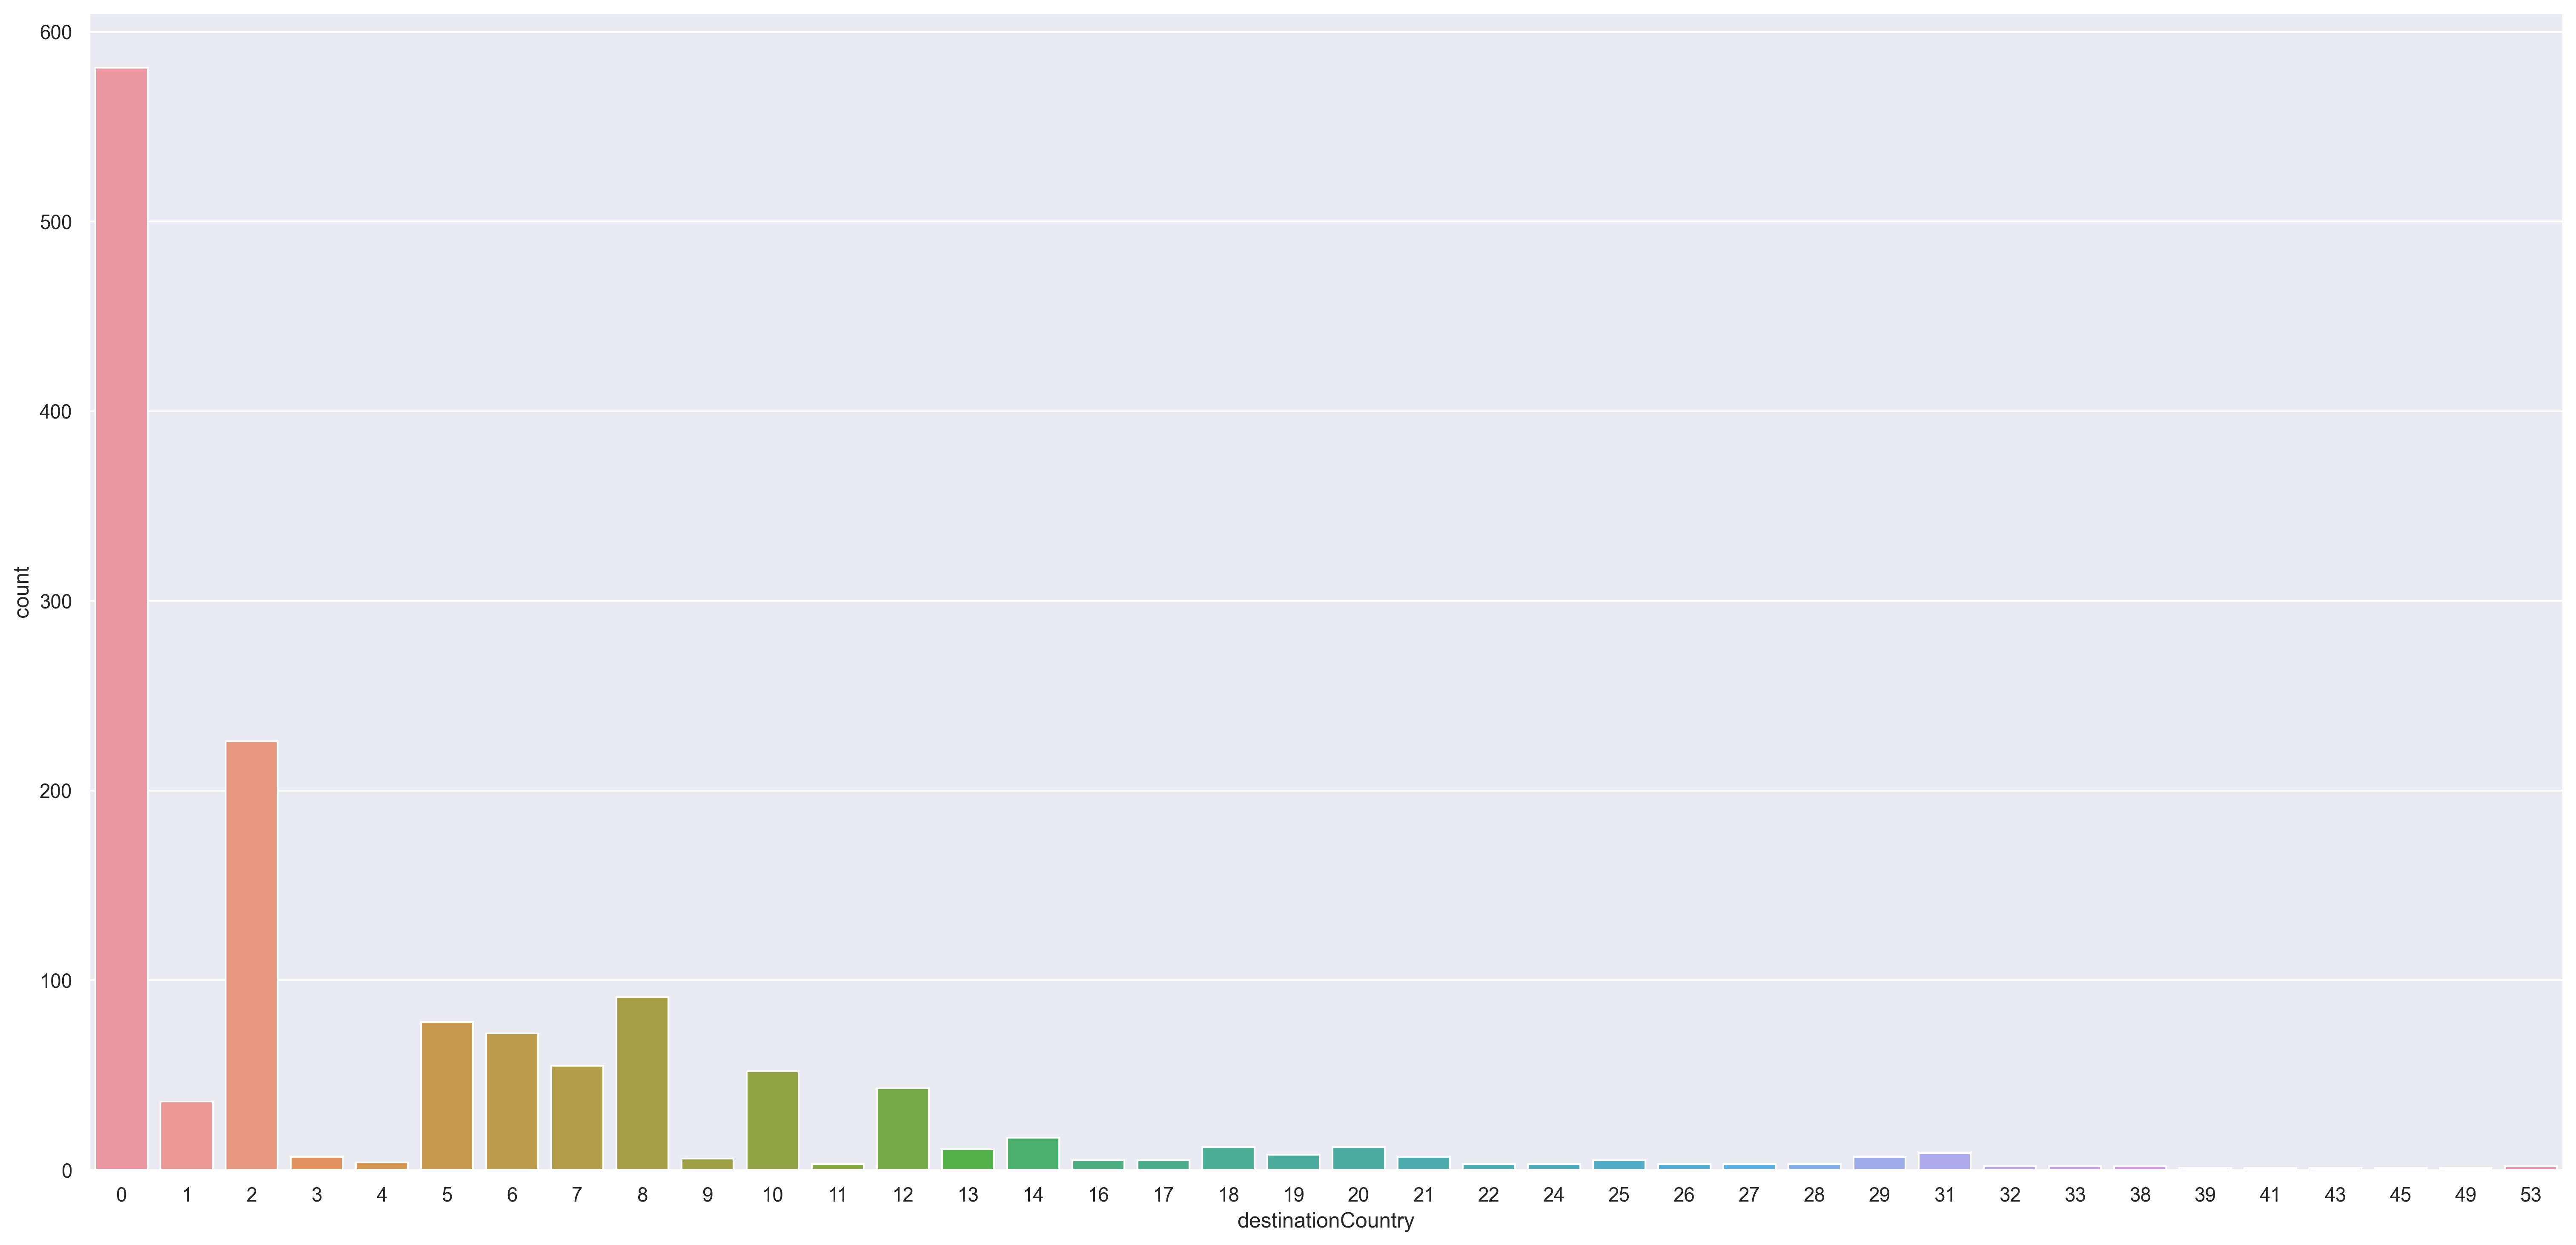

In [112]:

# Plot the number of destination countries for cancelled orders

plt.figure(figsize=(25,12), dpi=300)
p = sns.countplot(x="destinationCountry", data=cancelled_orders)
plt.show()

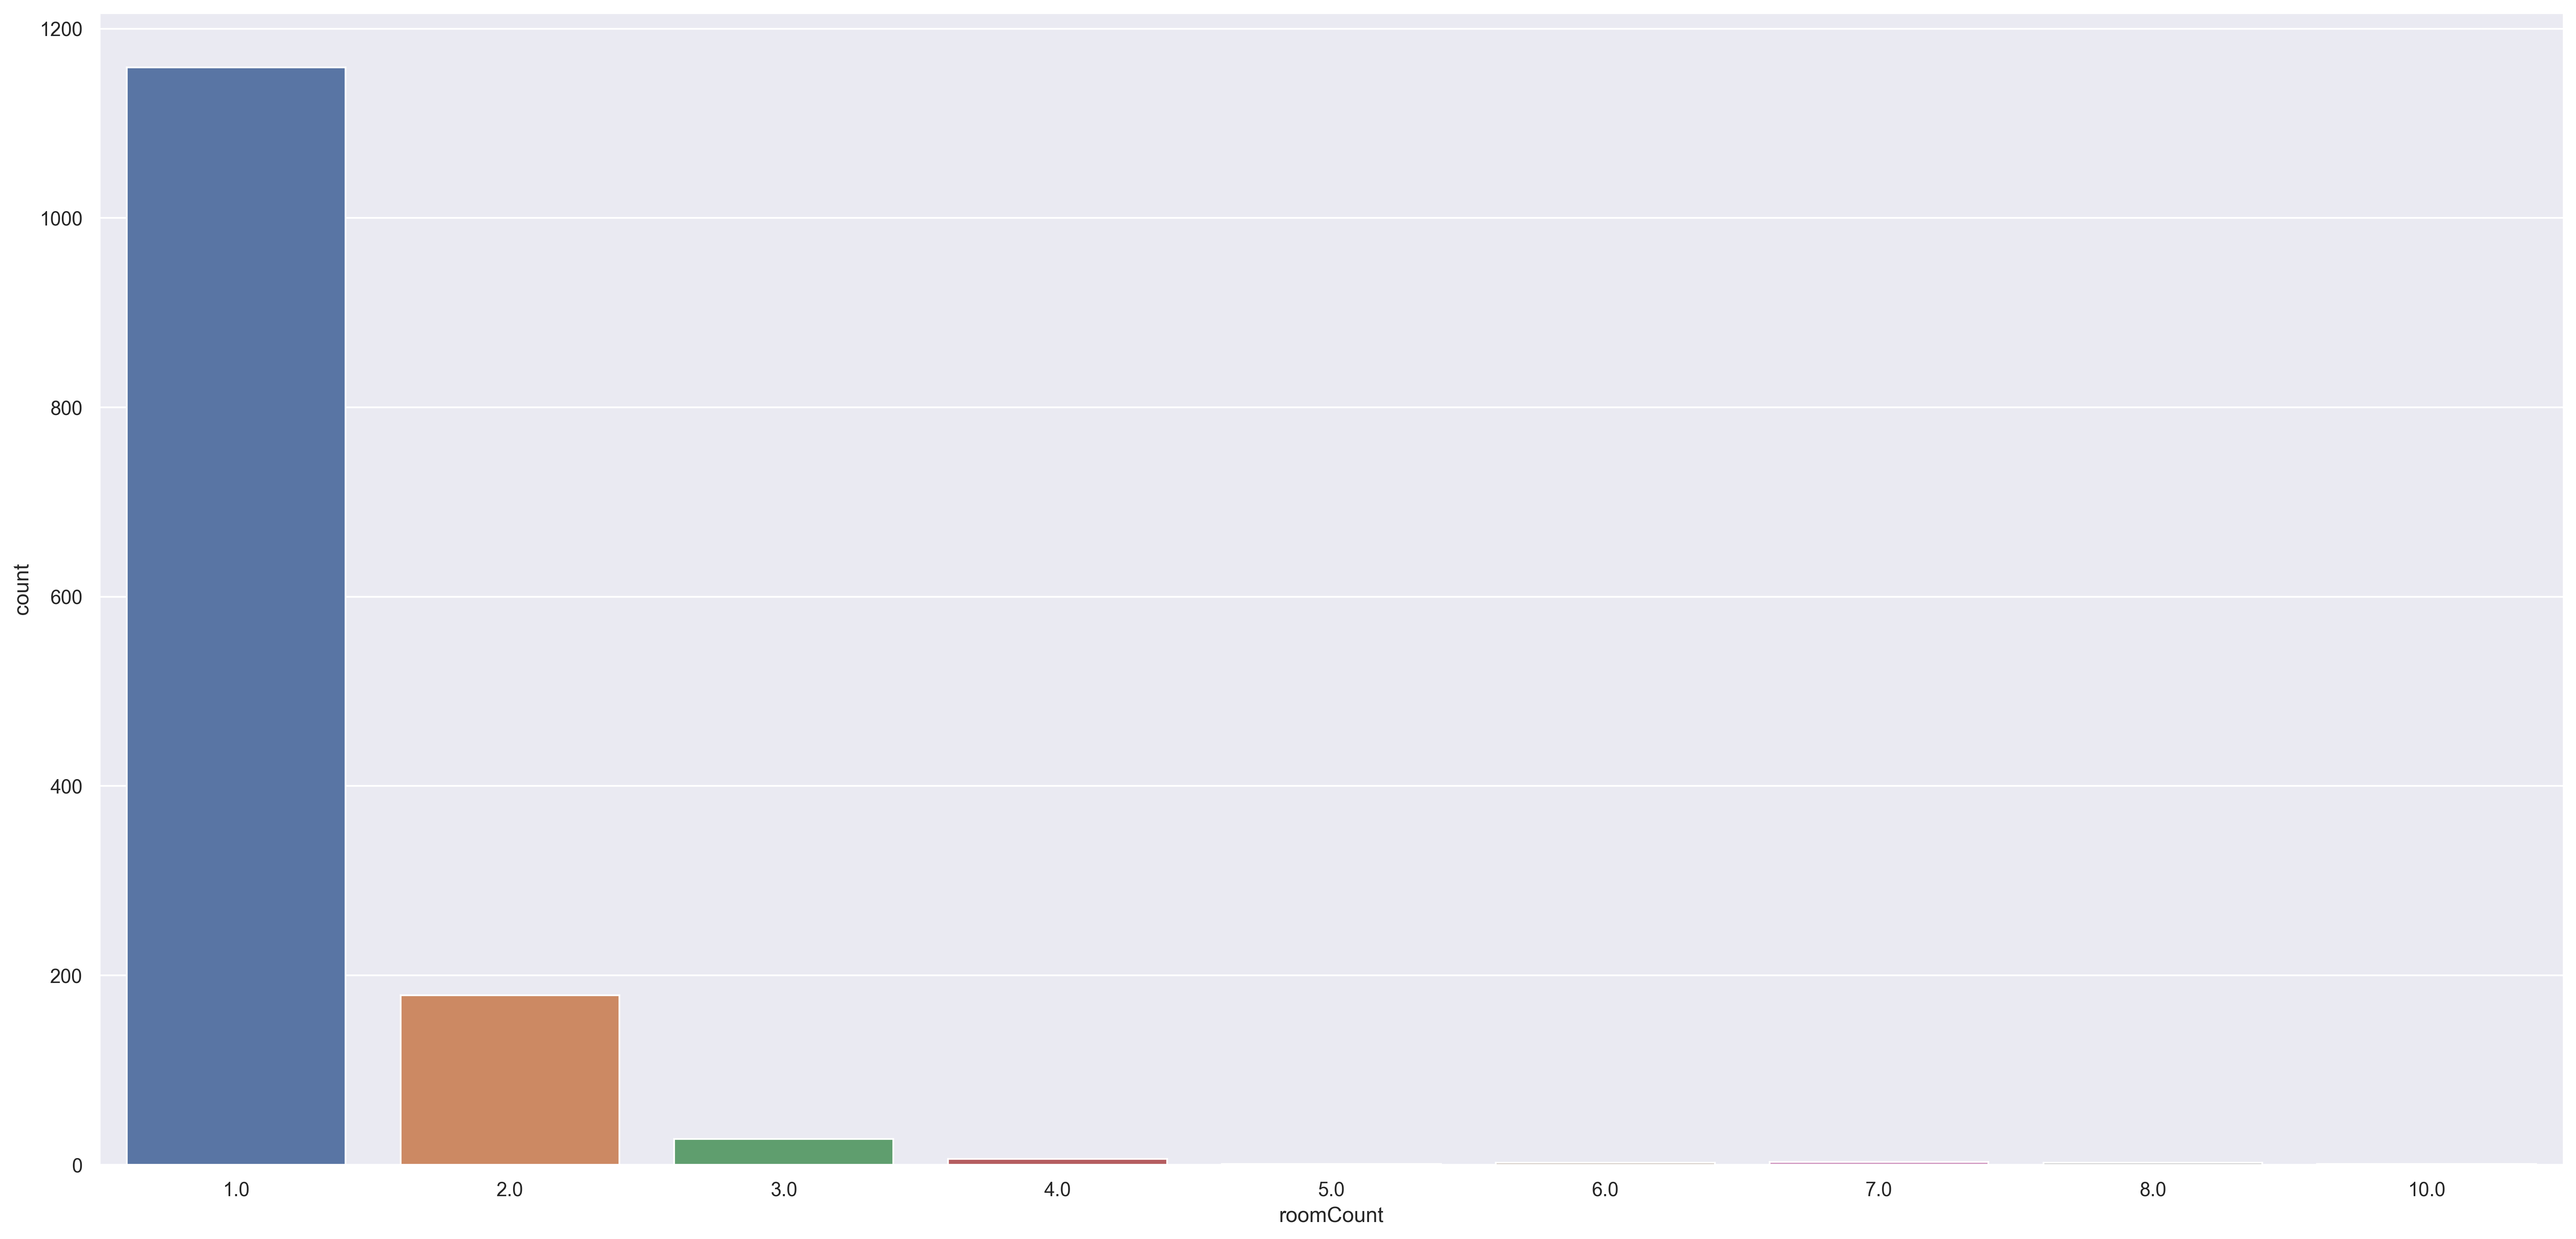

In [161]:
# Plot the number of destination countries for cancelled orders
plt.figure(figsize=(25,12), dpi=300)
p = sns.countplot(x="roomCount", data=cancelled_orders)
plt.show()

In [113]:
df.columns

Index(['destinationCountry', 'roomCount', 'udid', 'email', 'phone',
       'guest_country_code', 'is_cardless', 'stars', 'type',
       'NormalizedTotalBookingPrice', 'NormalizedLowRate',
       'numberOfBookedNights', 'numberOfReviews', 'AvgUserRating', 'hotel_id',
       'hasSpecialRequest', 'hasFreeCancellation', 'cancelledOrNoShow',
       'is_internal'],
      dtype='object')

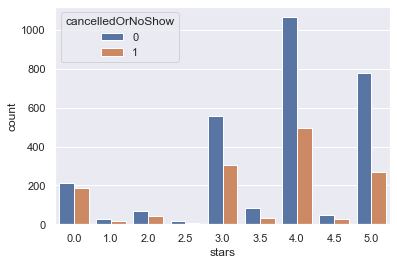

In [114]:
sns.countplot(x='stars', hue='cancelledOrNoShow', data=df)
plt.show()


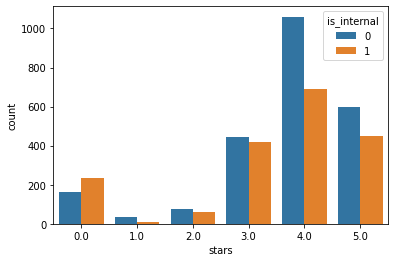

In [41]:
sns.countplot(x='stars', hue='is_internal', data=df)
plt.show()

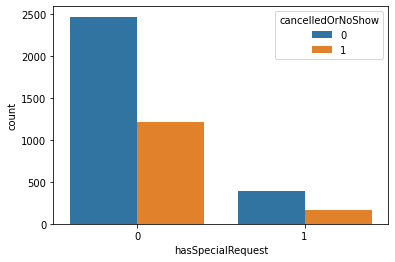

In [42]:
sns.countplot(x='hasSpecialRequest', hue='cancelledOrNoShow', data=df)
plt.show()

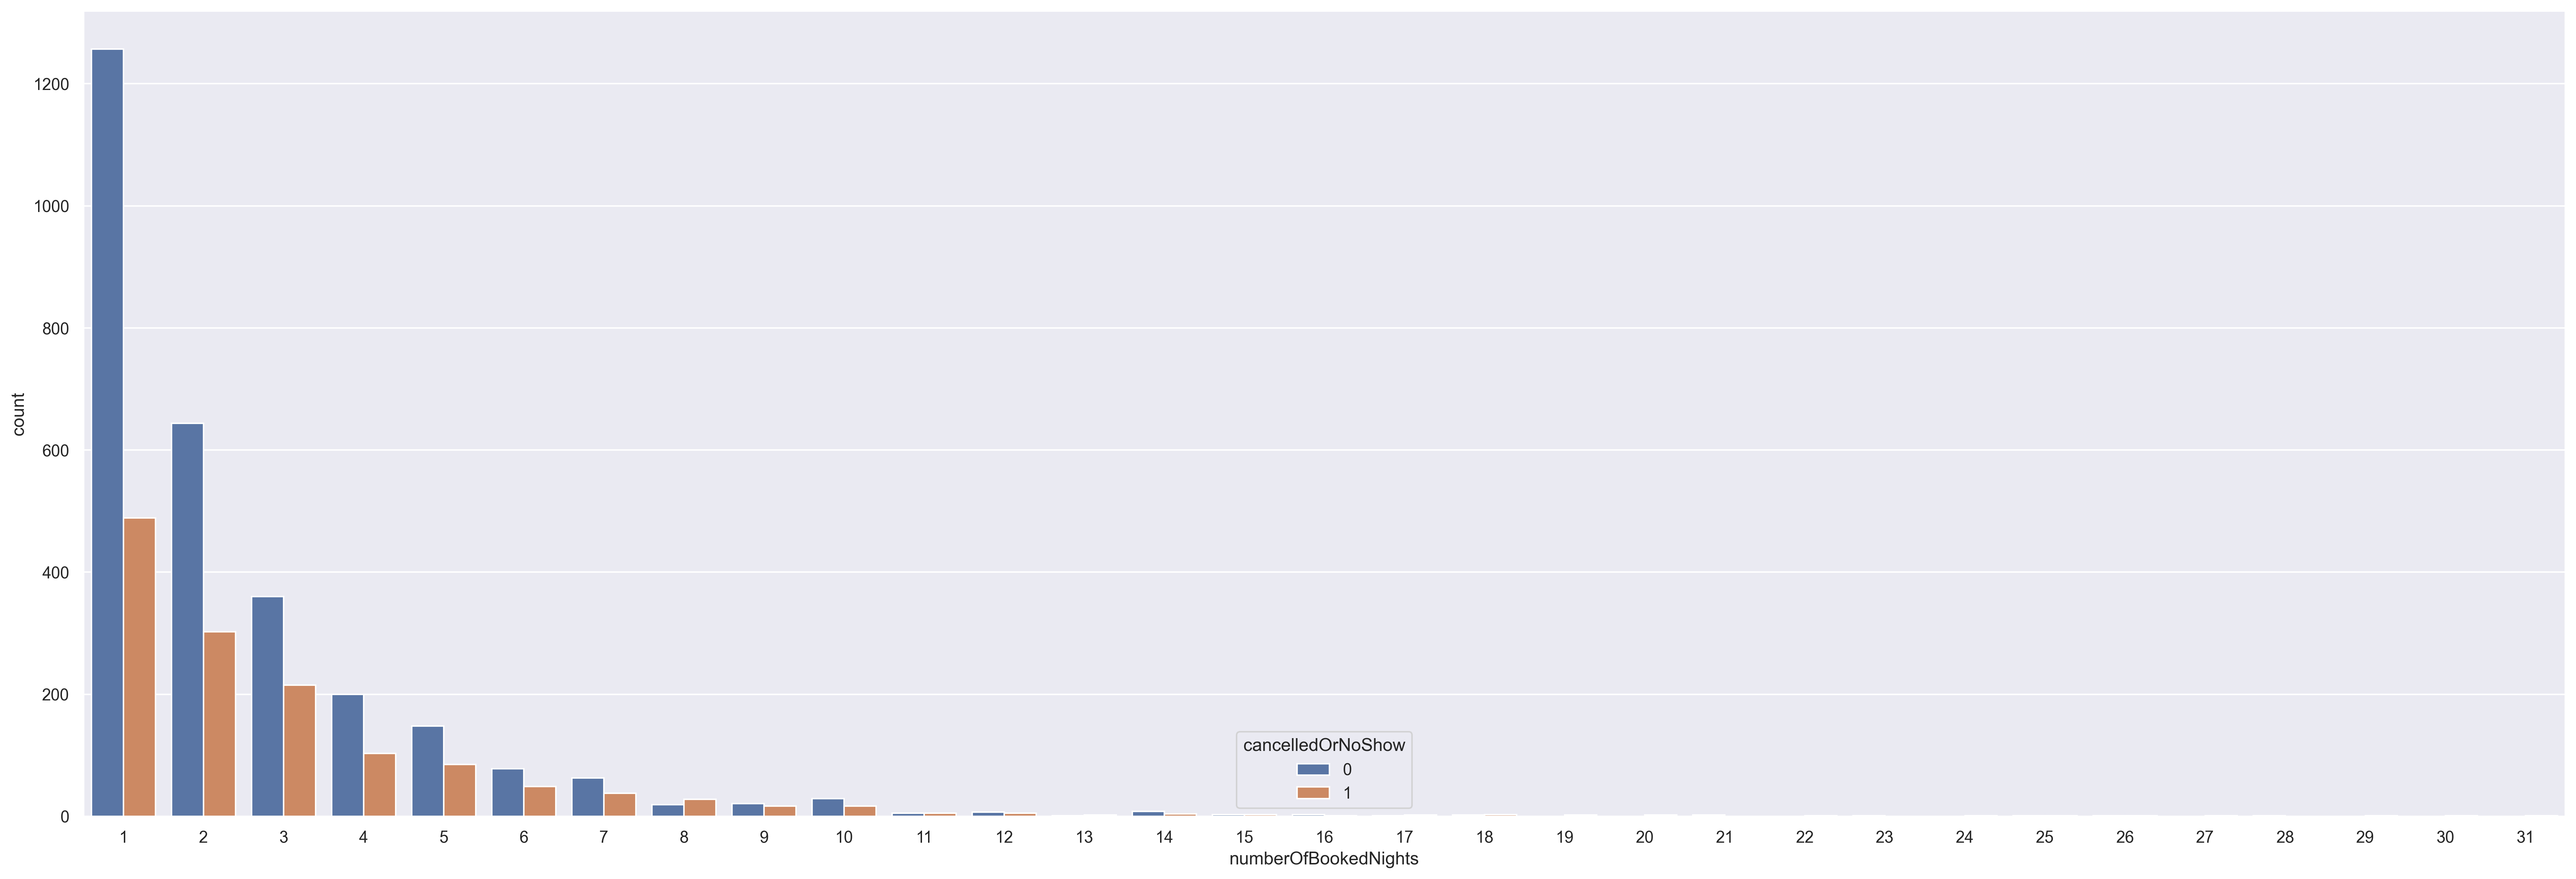

In [115]:
plt.figure(figsize=(30,10), dpi=300)
sns.countplot(x='numberOfBookedNights', hue= 'cancelledOrNoShow', data=df)
plt.show()

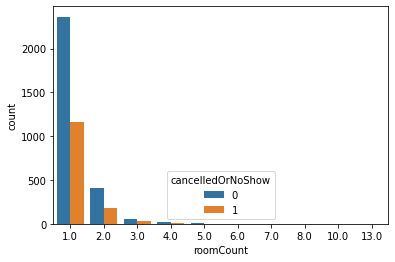

In [44]:
sns.countplot(x='roomCount', hue= 'cancelledOrNoShow', data=df)
plt.show()

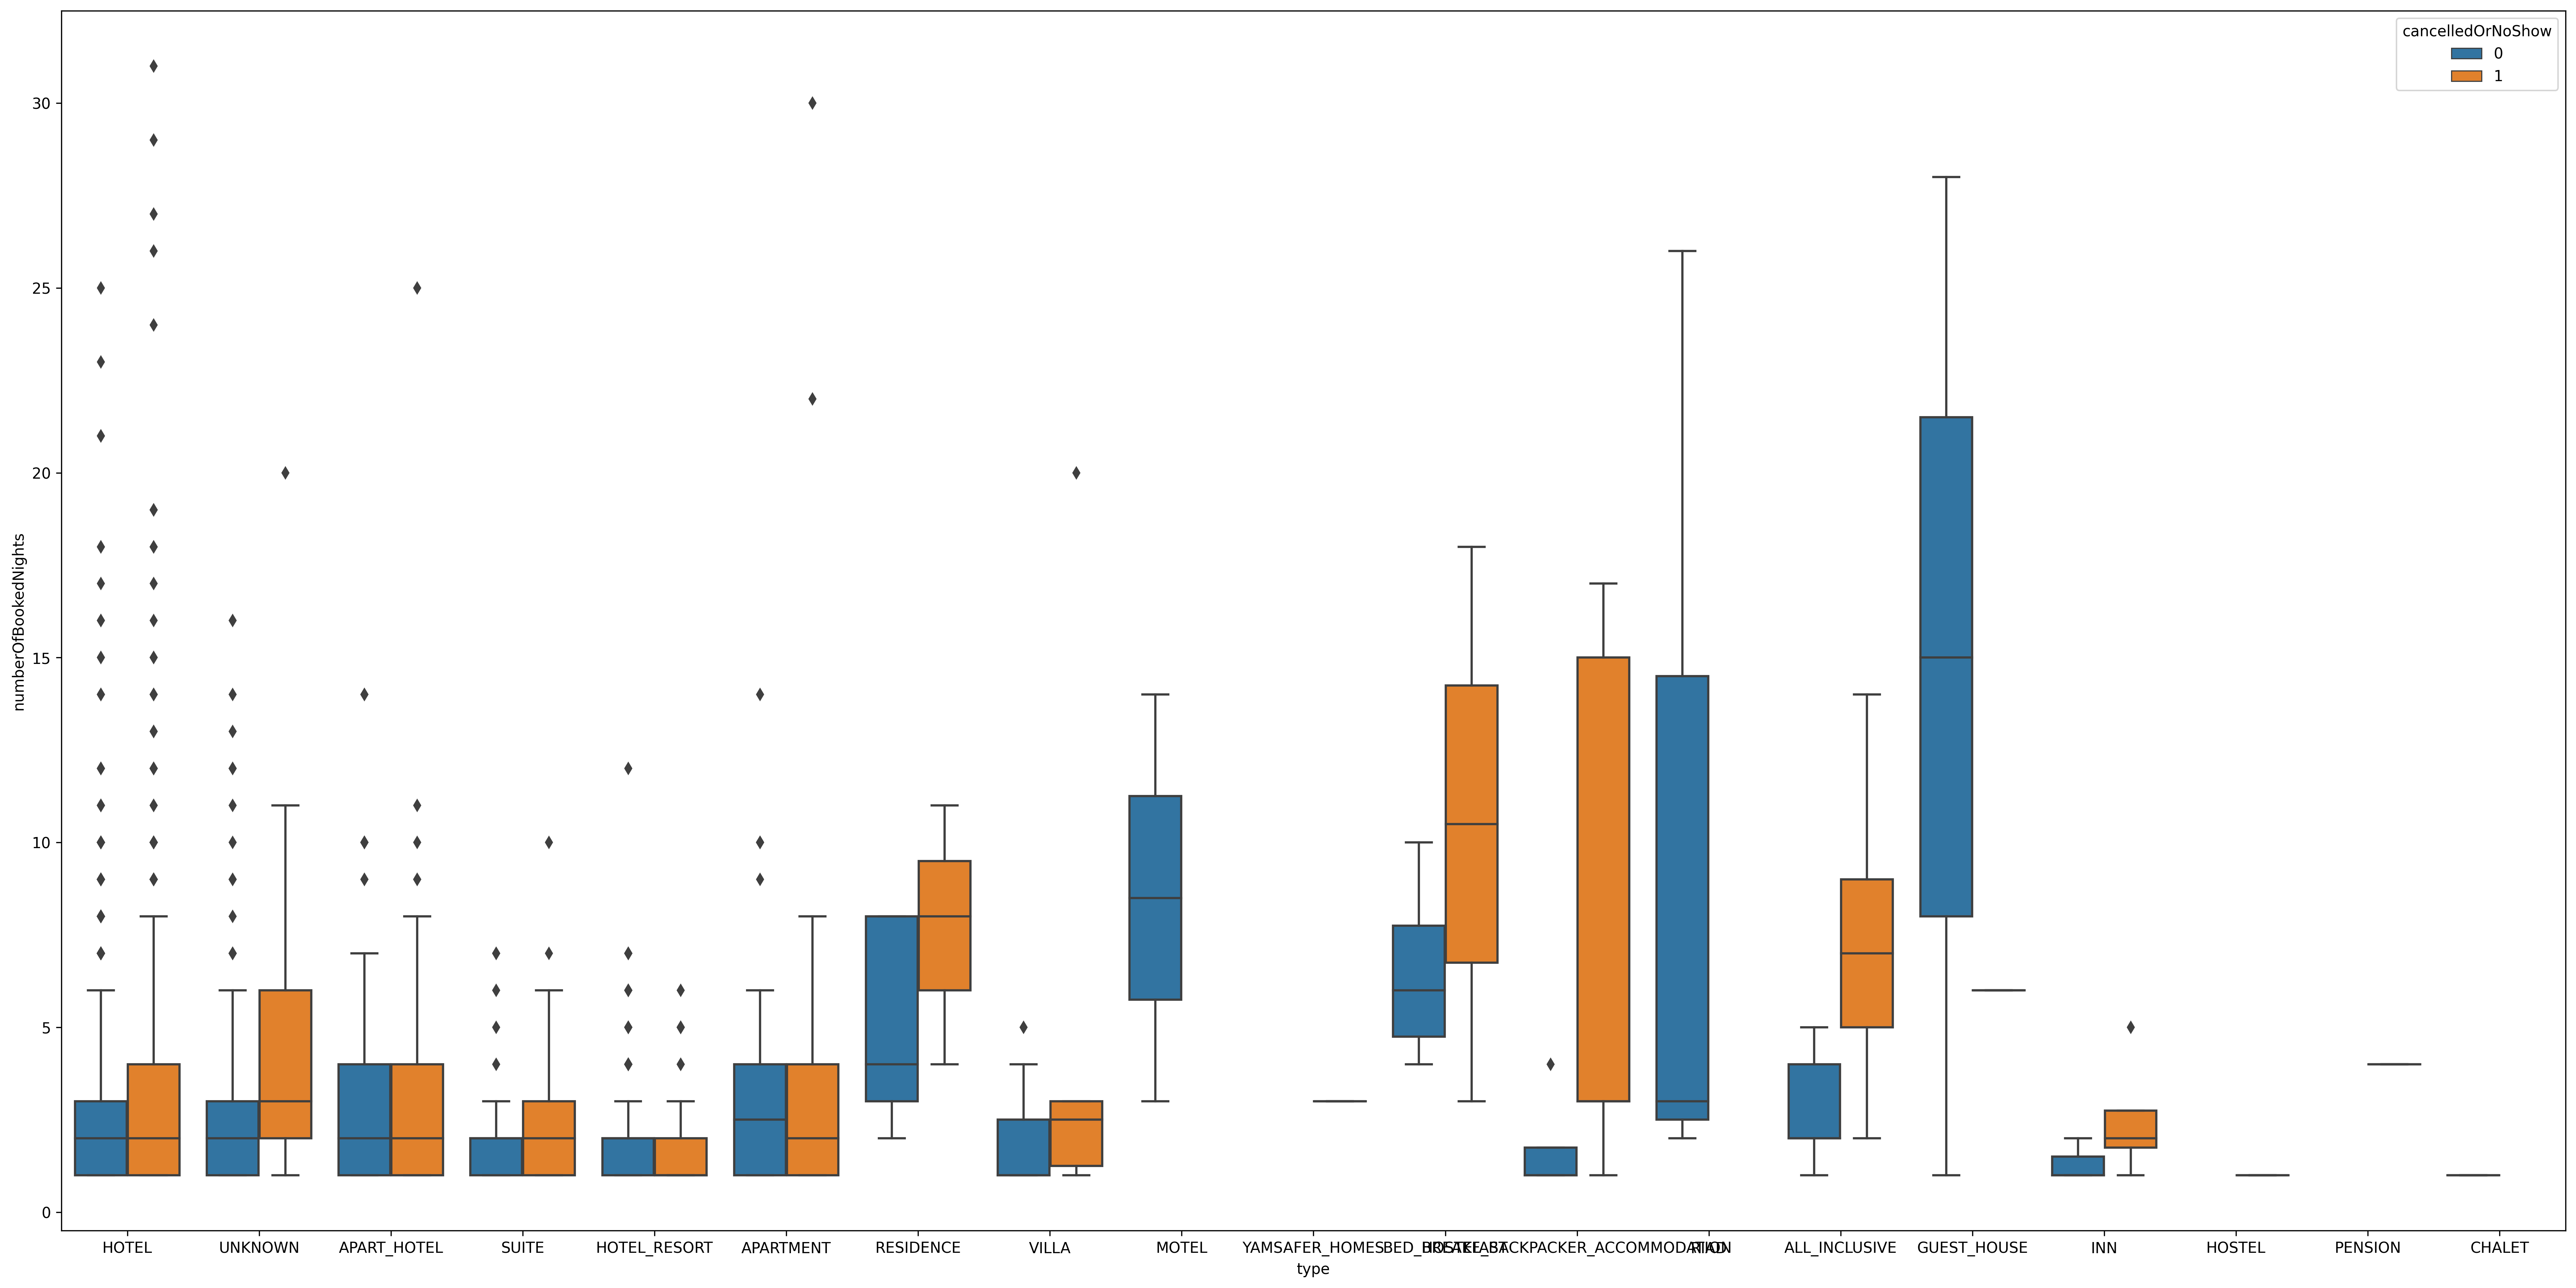

In [45]:
plt.figure(figsize=(30,15), dpi=300)
sns.boxplot(x='type', y='numberOfBookedNights', hue='cancelledOrNoShow', data=df)
plt.show()

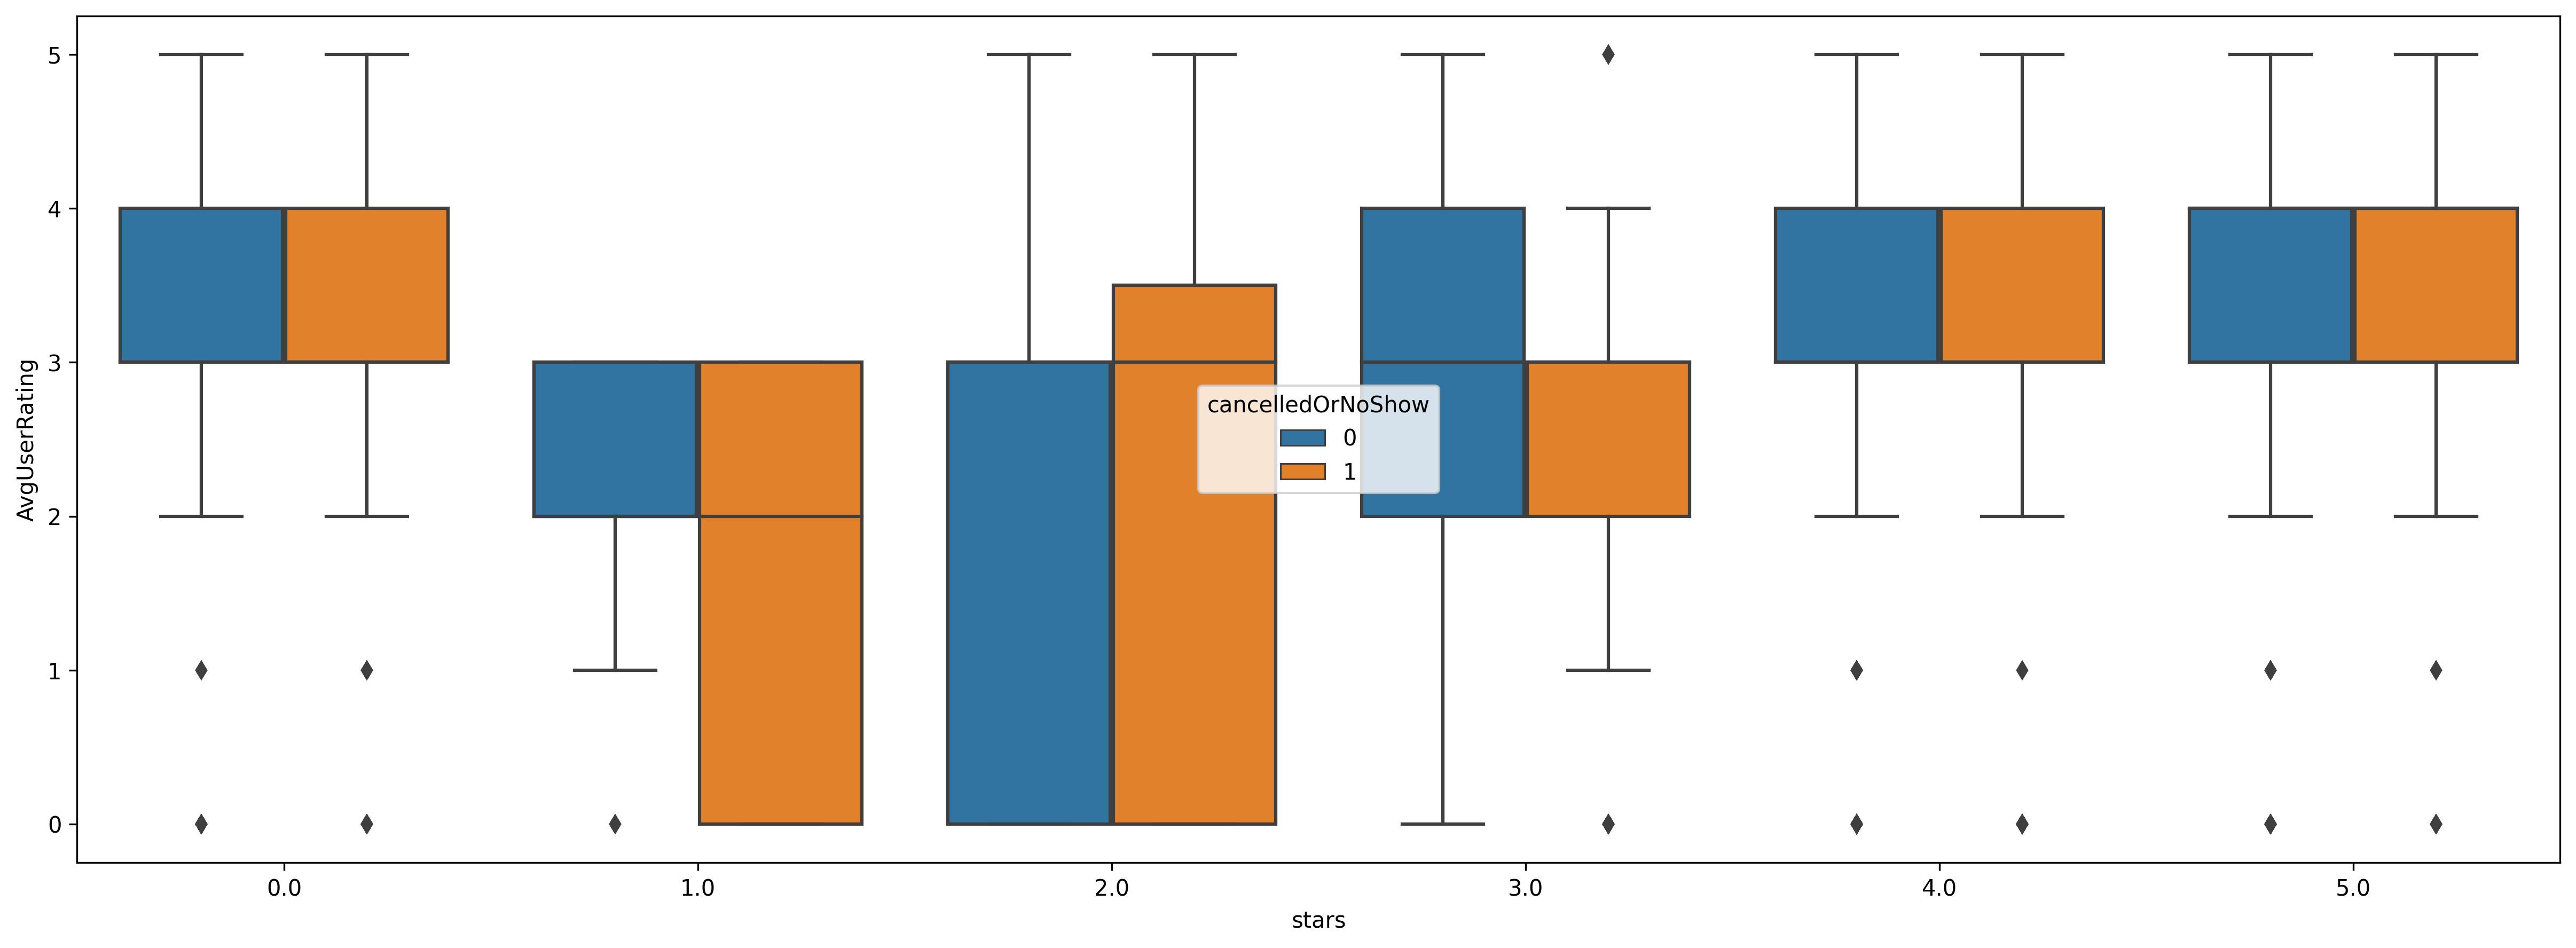

In [46]:
plt.figure(figsize=(20,7), dpi=300)
sns.boxplot(x='stars', y='AvgUserRating', hue= 'cancelledOrNoShow', data=df)
plt.show()

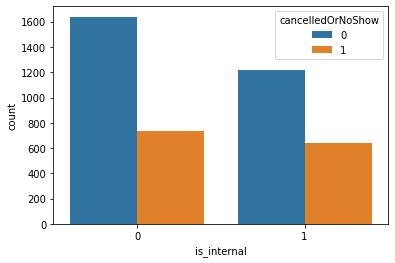

In [47]:
sns.countplot(x='is_internal', hue='cancelledOrNoShow', data=df)
plt.show()

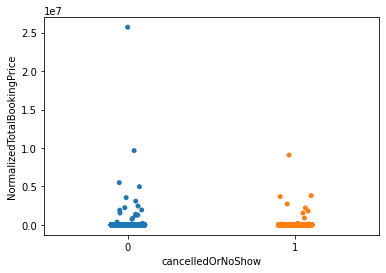

In [48]:
sns.stripplot(x="cancelledOrNoShow", y="NormalizedTotalBookingPrice", data=df);

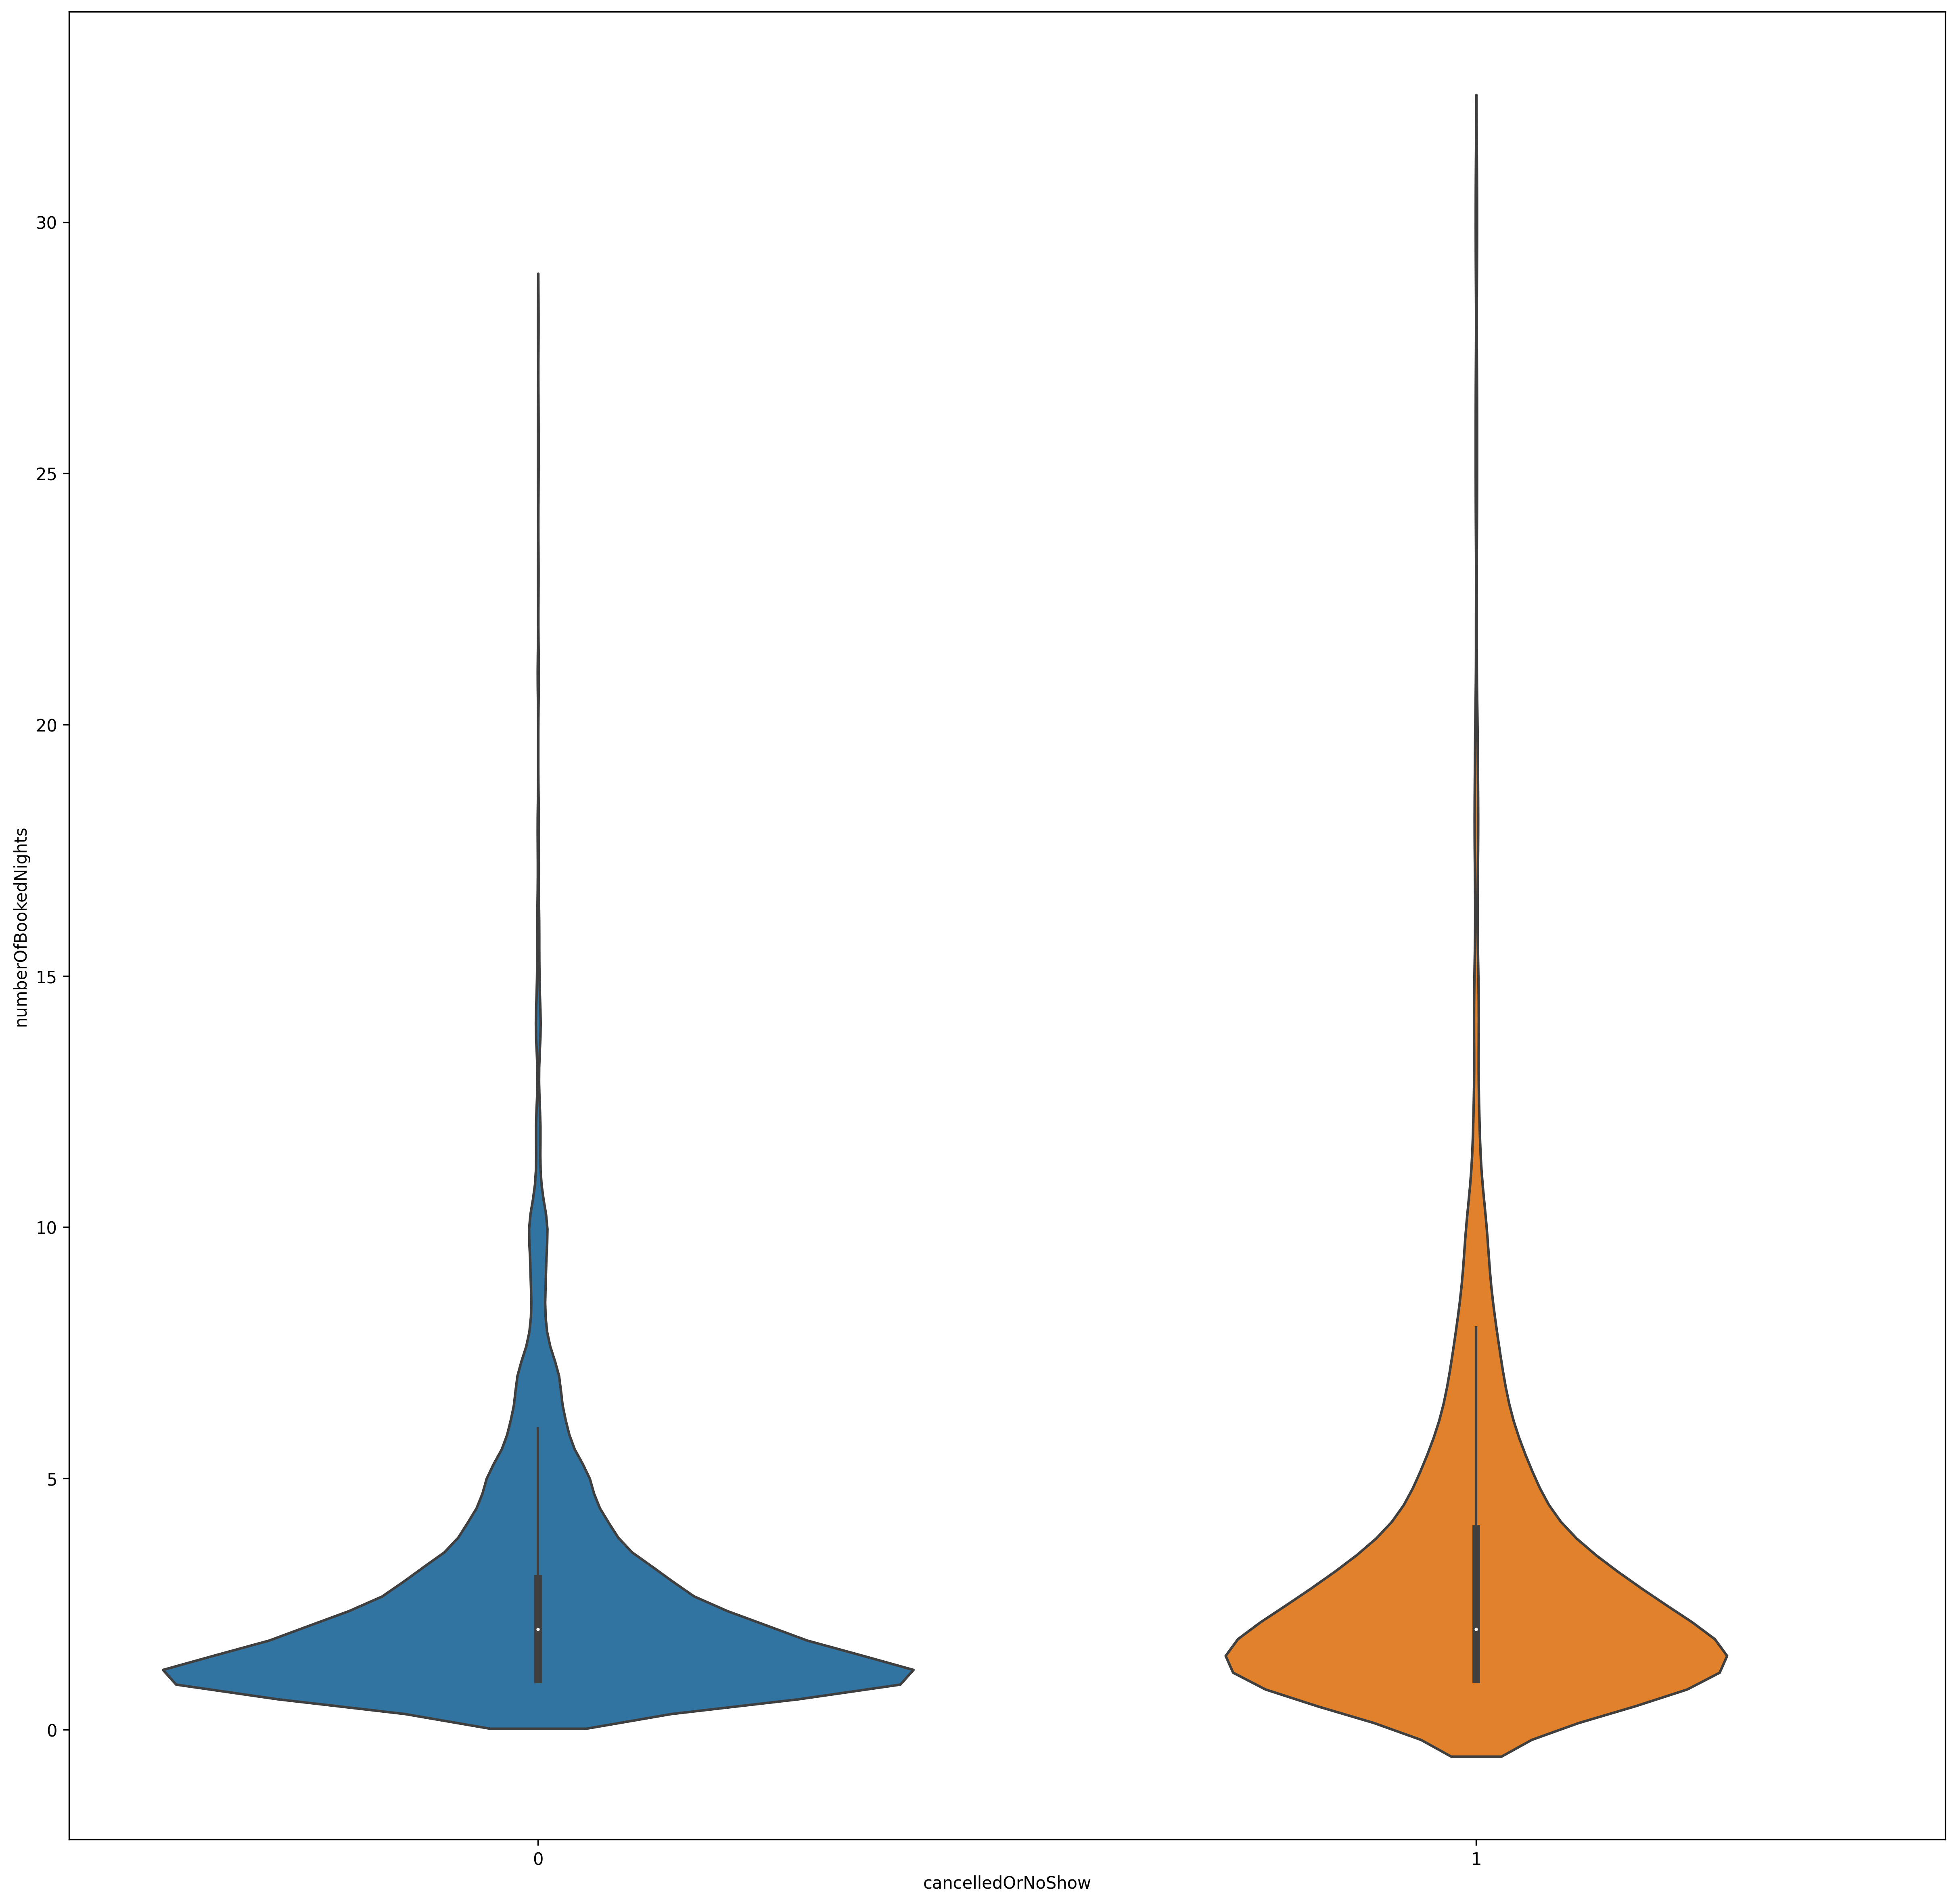

In [49]:
plt.figure(figsize=(20,20), dpi=300)
sns.violinplot(x="cancelledOrNoShow", y="numberOfBookedNights", data=df, split=True);

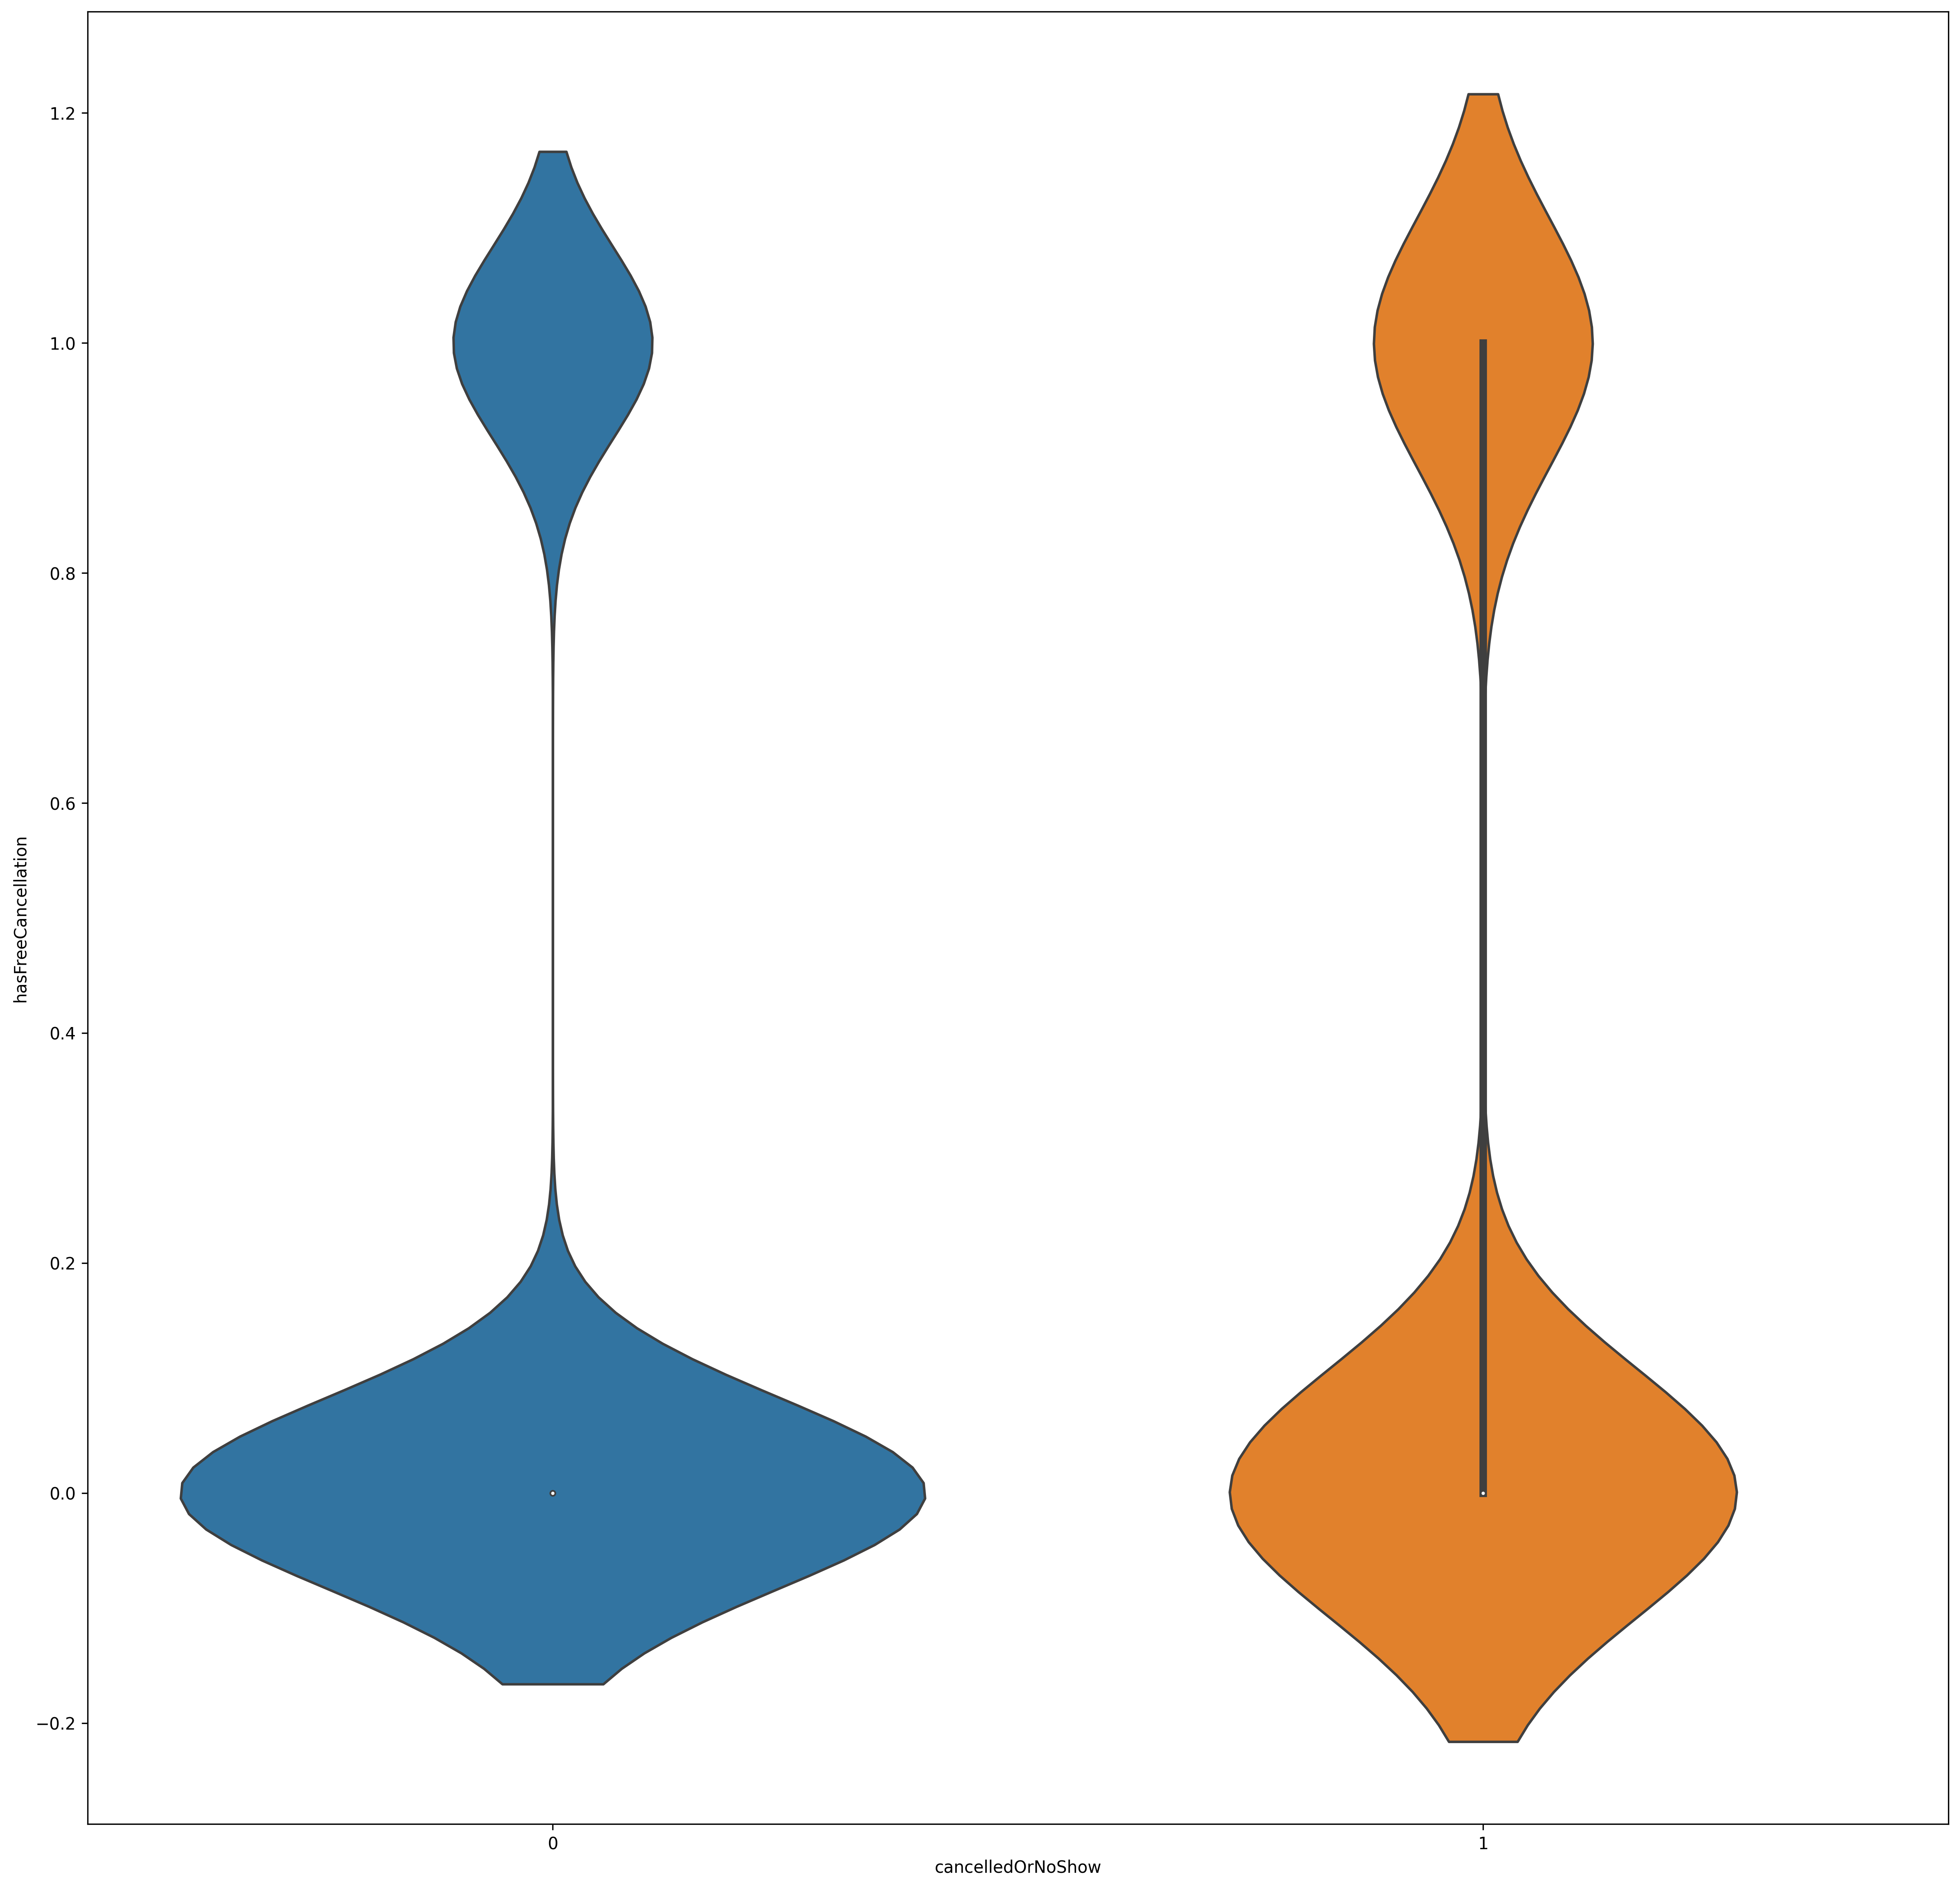

In [50]:
plt.figure(figsize=(20,20), dpi=300)
#axis(side=1,at=1:19)
sns.violinplot(x="cancelledOrNoShow", y="hasFreeCancellation", data=df, split=True);

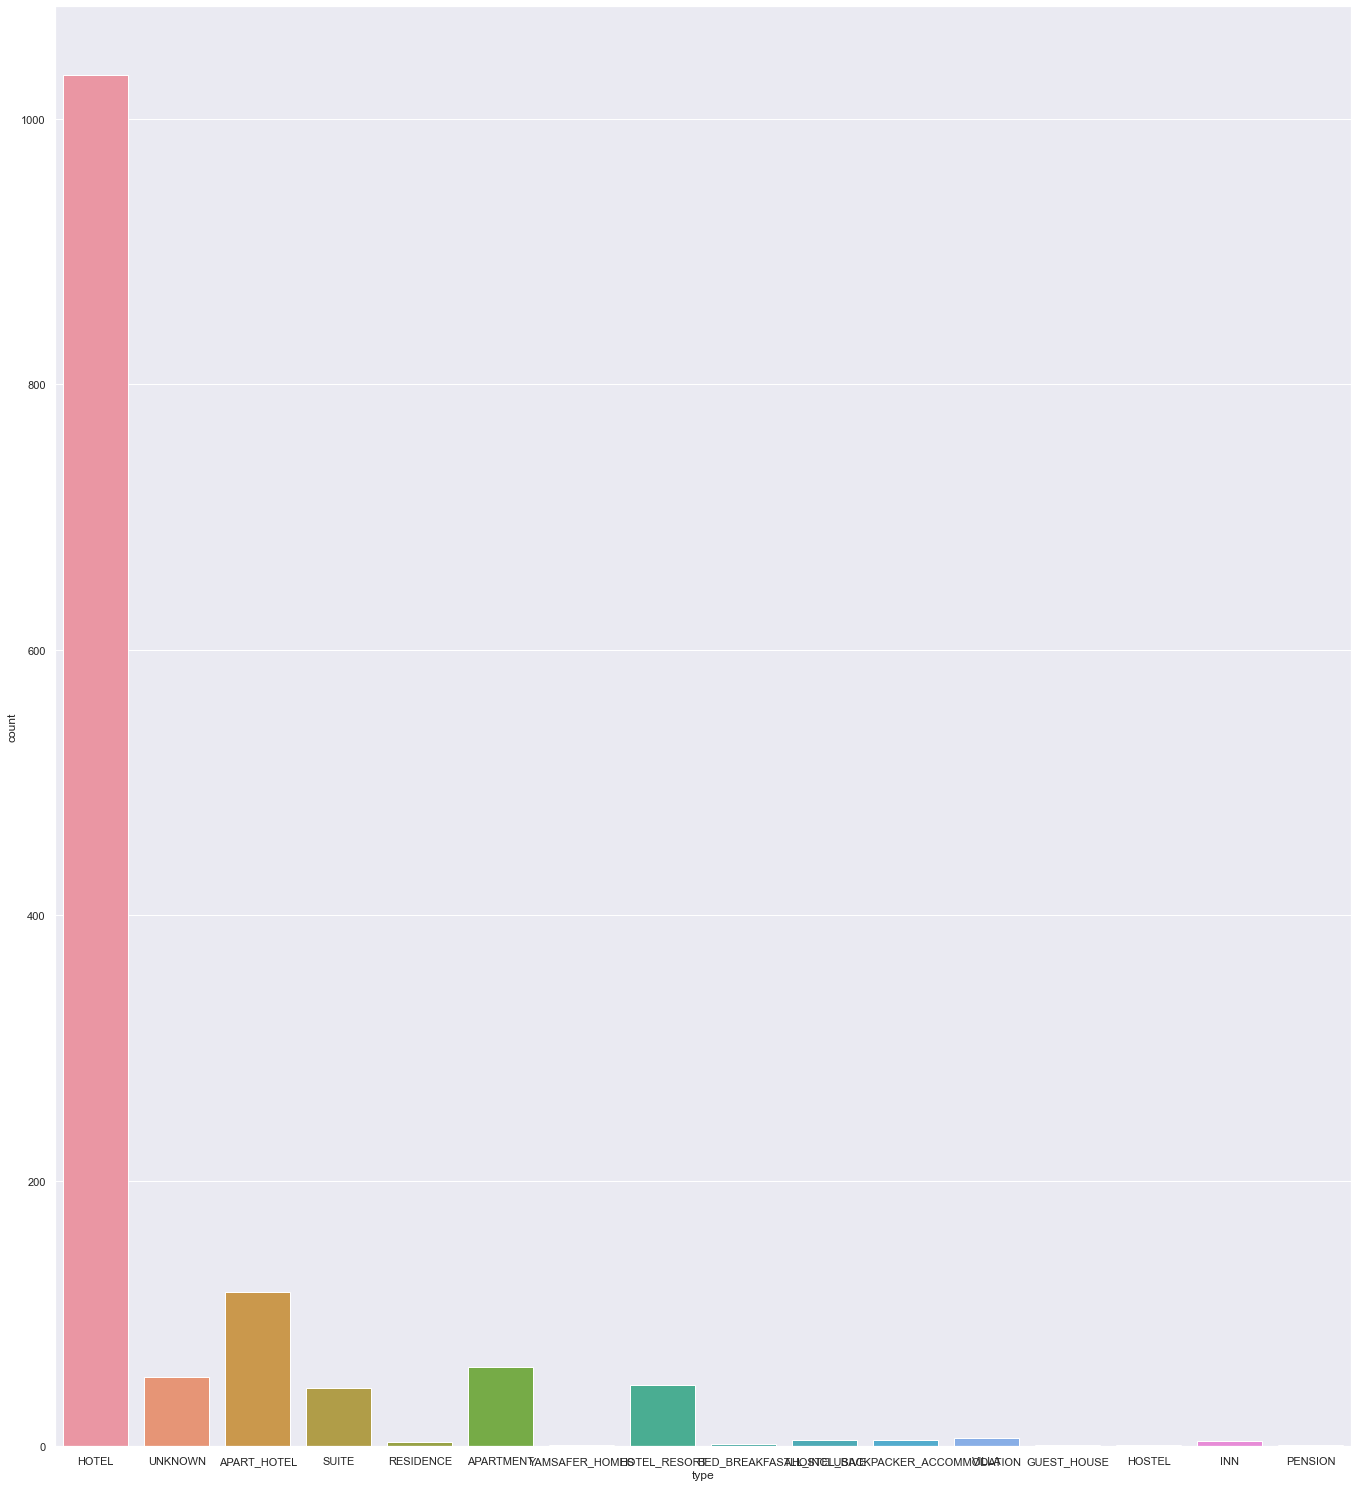

In [51]:
sns.set()
ax2 = plt.axes([0, 2, 3, 5])
sns.countplot(x='type', data=cancelled_orders)
plt.show()

In [116]:
labels, levels = pd.factorize(df['type'])
df['type']= labels

#labels, levels = pd.factorize(df_feat['type'])
#df_feat['type']= labels

<AxesSubplot:>

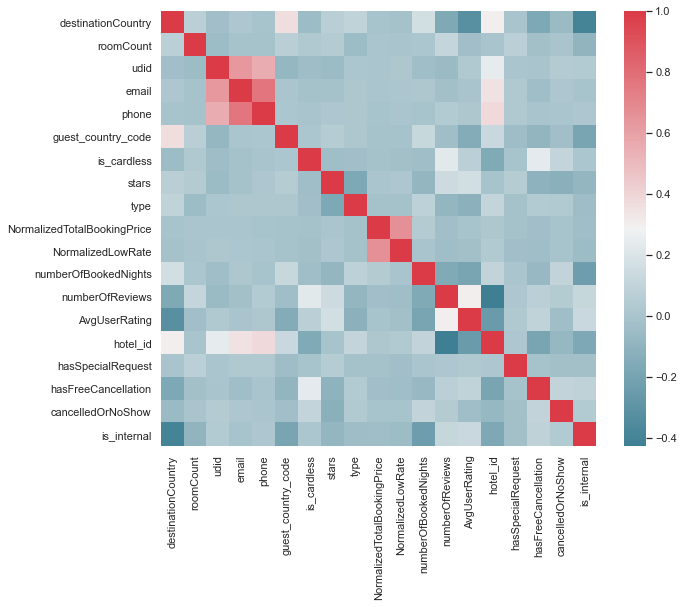

In [117]:
import seaborn as sns
sns.set()
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [118]:
df.columns

Index(['destinationCountry', 'roomCount', 'udid', 'email', 'phone',
       'guest_country_code', 'is_cardless', 'stars', 'type',
       'NormalizedTotalBookingPrice', 'NormalizedLowRate',
       'numberOfBookedNights', 'numberOfReviews', 'AvgUserRating', 'hotel_id',
       'hasSpecialRequest', 'hasFreeCancellation', 'cancelledOrNoShow',
       'is_internal'],
      dtype='object')

In [119]:
df_target        = df['cancelledOrNoShow']
df_feat_all      = df.drop(['cancelledOrNoShow'], axis=1)
df_feat_selected = df[['is_cardless', 'numberOfBookedNights', 'hasFreeCancellation', 'hasSpecialRequest']]

In [120]:
import imblearn

In [121]:
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE
from collections import Counter 

0.8.0


In [122]:
from sklearn.linear_model import LogisticRegression

In [123]:
logreg = LogisticRegression()


In [124]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(df_feat_all,df['cancelledOrNoShow'],test_size=0.30, random_state=101)

In [125]:
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

logreg.score(X_test, Y_test)

0.6789929189614476

In [126]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(df_feat_selected,df['cancelledOrNoShow'],test_size=0.30, random_state=101)

In [127]:
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

logreg.score(X_test, Y_test)

0.6671911880409127

In [128]:
df_target = df['cancelledOrNoShow']
#Setting the features
df_feat_all      = df.drop(['cancelledOrNoShow'], axis=1)
df_feat_selected = df[['is_cardless', 'numberOfBookedNights', 'hasFreeCancellation', 'hasSpecialRequest']]

In [129]:
df_feat_all.head()

,destinationCountry,roomCount,udid,email,phone,guest_country_code,is_cardless,stars,type,NormalizedTotalBookingPrice,NormalizedLowRate,numberOfBookedNights,numberOfReviews,AvgUserRating,hotel_id,hasSpecialRequest,hasFreeCancellation,is_internal
0,0,1.0,0,0,0,0,0,4.0,0,229.0,166.0,1,103.0,3.9643,0,0,1,1
1,1,2.0,1,1,1,0,0,1.0,0,126.0,90.0,2,10.0,1.0000,1,0,0,0
2,2,1.0,2,2,2,0,0,5.0,0,1722.0,753.0,4,25.0,3.8000,2,1,0,0
3,0,1.0,3,3,3,1,0,3.5,1,685.0,373.0,2,16.0,3.6000,3,0,0,0
4,2,1.0,0,4,4,2,0,5.0,0,427.0,401.0,1,10.0,5.0000,4,0,0,1


In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X_train, X_test, y_train, y_test = train_test_split(df_feat_all, np.ravel(df_target), test_size=0.30, random_state=101)

In [135]:
oversample = SMOTE()
X_train, Y_train = oversample.fit_resample(X_train, Y_train)
counter = Counter(Y_train)
print(counter)

Counter({0: 1992, 1: 1992})


In [136]:
from sklearn.svm import SVC

In [137]:
#Use sigmoid kernel since it is logistic regression
model = SVC(kernel='sigmoid')

In [138]:
model.fit(X_train,Y_train)

SVC(kernel='sigmoid')

In [139]:
predictions = model.predict(X_test)

In [140]:
from sklearn.metrics import classification_report,confusion_matrix

In [141]:
print(confusion_matrix(y_test,predictions))

[[ 51 812]
 [ 31 377]]


In [142]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.62      0.06      0.11       863
           1       0.32      0.92      0.47       408

    accuracy                           0.34      1271
   macro avg       0.47      0.49      0.29      1271
weighted avg       0.52      0.34      0.22      1271



In [146]:
X_train, X_test, Y_train, Y_test = train_test_split(df_feat_selected, np.ravel(df_target), test_size=0.30, random_state=101)

In [147]:
model.fit(X_train,Y_train)

SVC(kernel='sigmoid')

In [148]:
predictions = model.predict(X_test)

In [149]:
print(confusion_matrix(y_test,predictions))

[[667 196]
 [327  81]]


In [150]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       863
           1       0.29      0.20      0.24       408

    accuracy                           0.59      1271
   macro avg       0.48      0.49      0.48      1271
weighted avg       0.55      0.59      0.56      1271



In [151]:
clf = svm.SVC()
clf.fit(df_feat_selected, np.ravel(df_target))

SVC()

In [152]:
from sklearn.model_selection import cross_val_score

In [153]:
cross_val_score(clf, df_feat_selected, np.ravel(df_target), cv=5, scoring='accuracy').mean()

0.6753246753246754

In [154]:
# note the scale of gamma and C
clf = svm.SVC(gamma=0.01, C=2)
cross_val_score(clf, df_feat_selected, np.ravel(df_target), cv=5, scoring='accuracy').mean()

0.67556080283353

In [85]:
df.columns

Index(['destinationCountry', 'roomCount', 'udid', 'email', 'phone',
       'guest_country_code', 'is_cardless', 'stars', 'type',
       'NormalizedTotalBookingPrice', 'NormalizedLowRate',
       'numberOfBookedNights', 'numberOfReviews', 'AvgUserRating', 'hotel_id',
       'hasSpecialRequest', 'hasFreeCancellation', 'cancelledOrNoShow',
       'is_internal'],
      dtype='object')

In [155]:
new_df = df[['roomCount', 'destinationCountry', 'guest_country_code', 'stars', 'NormalizedTotalBookingPrice', 'cancelledOrNoShow']]

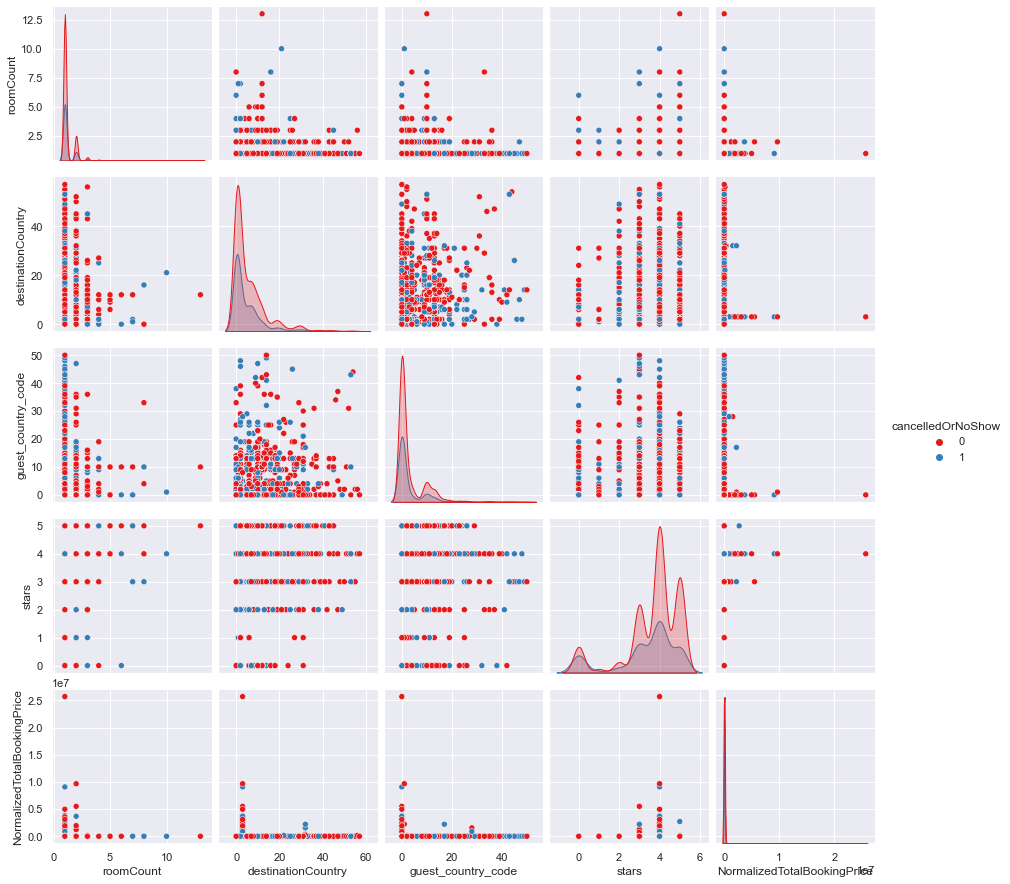

In [87]:
sns.pairplot(new_df,hue='cancelledOrNoShow',palette='Set1')

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
X_train, X_test, y_train, y_test = train_test_split(df_feat_all, np.ravel(df_target), test_size=0.30, random_state=101)

In [158]:
oversample = SMOTE()
X_train, Y_train = oversample.fit_resample(X_train, Y_train)
counter = Counter(Y_train)
print(counter)

Counter({0: 1992, 1: 1992})


In [159]:
from sklearn.tree import DecisionTreeClassifier

In [160]:
dtree = DecisionTreeClassifier()

In [161]:
dtree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [162]:
predictions = dtree.predict(X_test)

In [163]:
from sklearn.metrics import classification_report,confusion_matrix

In [164]:
print(confusion_matrix(y_test,predictions))

[[564 299]
 [242 166]]


In [165]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.70      0.65      0.68       863
           1       0.36      0.41      0.38       408

    accuracy                           0.57      1271
   macro avg       0.53      0.53      0.53      1271
weighted avg       0.59      0.57      0.58      1271



In [166]:
df_feat_selected = df[['is_cardless', 'hasFreeCancellation', 'hasSpecialRequest', 'destinationCountry', 'stars', 'type']]

In [167]:
X_train, X_test, Y_train, Y_test = train_test_split(df_feat_selected, np.ravel(df_target), test_size=0.30, random_state=101)

In [168]:
oversample = SMOTE()
X_train, Y_train = oversample.fit_resample(X_train, Y_train)
counter = Counter(Y_train)
print(counter)

Counter({0: 1992, 1: 1992})


In [170]:
dtree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [171]:
predictions = dtree.predict(X_test)

In [172]:
print(confusion_matrix(y_test,predictions))

[[552 311]
 [225 183]]


In [173]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.64      0.67       863
           1       0.37      0.45      0.41       408

    accuracy                           0.58      1271
   macro avg       0.54      0.54      0.54      1271
weighted avg       0.60      0.58      0.59      1271



In [176]:
X_train, X_test, Y_train, Y_test = train_test_split(df_feat_all, np.ravel(df_target), test_size=0.30, random_state=101)

In [177]:
oversample = SMOTE()
X_train, Y_train = oversample.fit_resample(X_train, Y_train)
counter = Counter(Y_train)
print(counter)

Counter({0: 1992, 1: 1992})


In [179]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=4)
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=4)

In [180]:
rfc_pred = rfc.predict(X_test)

In [181]:
print(confusion_matrix(Y_test,rfc_pred))

[[704 159]
 [313  95]]


In [182]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75       863
           1       0.37      0.23      0.29       408

    accuracy                           0.63      1271
   macro avg       0.53      0.52      0.52      1271
weighted avg       0.59      0.63      0.60      1271



In [108]:
X_train, X_test, y_train, y_test = train_test_split(df_feat_selected, np.ravel(df_target), test_size=0.30, random_state=101)

In [109]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=4)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=4)

In [110]:
rfc_pred = rfc.predict(X_test)

In [111]:
print(confusion_matrix(y_test,rfc_pred))

[[735 128]
 [321  87]]


In [112]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.70      0.85      0.77       863
           1       0.40      0.21      0.28       408

    accuracy                           0.65      1271
   macro avg       0.55      0.53      0.52      1271
weighted avg       0.60      0.65      0.61      1271



In [113]:
df_target = df['cancelledOrNoShow']

#Setting the features
df_feat_all      = df.drop(['cancelledOrNoShow'], axis=1)
df_feat_selected = df[['is_cardless', 'hasFreeCancellation', 'hasSpecialRequest', 'destinationCountry', 'stars', 'type']]

In [114]:
from sklearn.preprocessing import StandardScaler

In [115]:
scaler = StandardScaler()

In [116]:
scaler.fit(df_feat_all)
scaled_features = scaler.transform(df_feat_all)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['cancelledOrNoShow'],
                                                    test_size=0.30)

In [118]:
from sklearn.neighbors import KNeighborsClassifier

In [119]:
knn = KNeighborsClassifier(n_neighbors=1)

In [120]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [121]:
pred = knn.predict(X_test)

In [122]:
print(confusion_matrix(y_test,pred))

[[593 287]
 [254 137]]


In [123]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.70      0.67      0.69       880
           1       0.32      0.35      0.34       391

    accuracy                           0.57      1271
   macro avg       0.51      0.51      0.51      1271
weighted avg       0.58      0.57      0.58      1271



In [124]:
# NOW WITH K=10
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=10')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=10


[[802  78]
 [339  52]]


              precision    recall  f1-score   support

           0       0.70      0.91      0.79       880
           1       0.40      0.13      0.20       391

    accuracy                           0.67      1271
   macro avg       0.55      0.52      0.50      1271
weighted avg       0.61      0.67      0.61      1271



In [125]:
scaler.fit(df_feat_selected)
scaled_features_selected = scaler.transform(df_feat_selected)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features_selected,df['cancelledOrNoShow'],
                                                    test_size=0.30)

In [127]:
knn = KNeighborsClassifier(n_neighbors=25)

In [128]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [129]:
pred = knn.predict(X_test)

In [130]:
print(confusion_matrix(y_test,pred))

[[796  37]
 [386  52]]


In [131]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.67      0.96      0.79       833
           1       0.58      0.12      0.20       438

    accuracy                           0.67      1271
   macro avg       0.63      0.54      0.49      1271
weighted avg       0.64      0.67      0.59      1271



In [132]:
df.columns

Index(['destinationCountry', 'roomCount', 'udid', 'email', 'phone',
       'guest_country_code', 'is_cardless', 'stars', 'type',
       'NormalizedTotalBookingPrice', 'NormalizedLowRate',
       'numberOfBookedNights', 'numberOfReviews', 'AvgUserRating', 'hotel_id',
       'hasSpecialRequest', 'hasFreeCancellation', 'cancelledOrNoShow',
       'is_internal'],
      dtype='object')

In [133]:
df_feat = df.drop(['udid', 'phone', 'email', 'cancelledOrNoShow', 'hotel_id', 'type'], axis=1)

df_feat.head()

,destinationCountry,roomCount,guest_country_code,is_cardless,stars,NormalizedTotalBookingPrice,NormalizedLowRate,numberOfBookedNights,numberOfReviews,AvgUserRating,hasSpecialRequest,hasFreeCancellation,is_internal
0,0,1.0,0,0,4.0,229.0,166.0,1,103.0,4.0,0,1,1
1,1,2.0,0,0,1.0,126.0,90.0,2,10.0,1.0,0,0,0
2,2,1.0,0,0,5.0,1722.0,753.0,4,25.0,4.0,1,0,0
3,0,1.0,1,0,4.0,685.0,373.0,2,16.0,4.0,0,0,0
4,2,1.0,2,0,5.0,427.0,401.0,1,10.0,5.0,0,0,1


In [134]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, np.ravel(df_target), test_size=0.30, random_state=101)

In [135]:
from sklearn.preprocessing import StandardScaler

In [136]:
scaler = StandardScaler()

In [137]:
# Fit only to the training data
scaler.fit(X_train)

StandardScaler()

In [138]:
StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler()

In [139]:
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [140]:
from sklearn.neural_network import MLPClassifier

In [141]:
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)

In [142]:
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500)

In [143]:
MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

MLPClassifier(activation='logistic', hidden_layer_sizes=(13, 13, 13),
              max_iter=500)

In [144]:
predictions = mlp.predict(X_test)

In [145]:
from sklearn.metrics import classification_report,confusion_matrix

In [146]:
print(confusion_matrix(y_test,predictions))

[[741 122]
 [301 107]]


In [147]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.86      0.78       863
           1       0.47      0.26      0.34       408

    accuracy                           0.67      1271
   macro avg       0.59      0.56      0.56      1271
weighted avg       0.63      0.67      0.64      1271



In [148]:
new_df = df
new_df['Review_Rating']=df['AvgUserRating']*df['numberOfReviews']

In [149]:
new_df.head()

,destinationCountry,roomCount,udid,email,phone,guest_country_code,is_cardless,stars,type,NormalizedTotalBookingPrice,NormalizedLowRate,numberOfBookedNights,numberOfReviews,AvgUserRating,hotel_id,hasSpecialRequest,hasFreeCancellation,cancelledOrNoShow,is_internal,Review_Rating
0,0,1.0,0,0,0,0,0,4.0,0,229.0,166.0,1,103.0,4.0,0,0,1,0,1,412.0
1,1,2.0,1,1,1,0,0,1.0,0,126.0,90.0,2,10.0,1.0,1,0,0,1,0,10.0
2,2,1.0,2,2,2,0,0,5.0,0,1722.0,753.0,4,25.0,4.0,2,1,0,1,0,100.0
3,0,1.0,3,3,3,1,0,4.0,1,685.0,373.0,2,16.0,4.0,3,0,0,0,0,64.0
4,2,1.0,0,4,4,2,0,5.0,0,427.0,401.0,1,10.0,5.0,4,0,0,0,1,50.0


In [151]:
new_df_feat = new_df.drop(['cancelledOrNoShow', 'type', 'phone'],axis=1)
X_train1, X_test1, Y_train1, Y_test1 = sklearn.model_selection.train_test_split(new_df_feat, new_df['cancelledOrNoShow'],test_size=0.30, random_state=101)

In [152]:
rfc = RandomForestClassifier(n_estimators=4)
rfc.fit(X_train1, Y_train1)

RandomForestClassifier(n_estimators=4)

In [153]:
rfc_pred = rfc.predict(X_test1)
print(confusion_matrix(rfc_pred,Y_test1))
print(classification_report(rfc_pred,Y_test1))

[[749 322]
 [114  86]]
              precision    recall  f1-score   support

           0       0.87      0.70      0.77      1071
           1       0.21      0.43      0.28       200

    accuracy                           0.66      1271
   macro avg       0.54      0.56      0.53      1271
weighted avg       0.76      0.66      0.70      1271



In [154]:
new_df['Room_Nights']=df['roomCount']*df['numberOfBookedNights']

In [155]:
new_df.head()

,destinationCountry,roomCount,udid,email,phone,guest_country_code,is_cardless,stars,type,NormalizedTotalBookingPrice,...,numberOfBookedNights,numberOfReviews,AvgUserRating,hotel_id,hasSpecialRequest,hasFreeCancellation,cancelledOrNoShow,is_internal,Review_Rating,Room_Nights
0,0,1.0,0,0,0,0,0,4.0,0,229.0,...,1,103.0,4.0,0,0,1,0,1,412.0,1.0
1,1,2.0,1,1,1,0,0,1.0,0,126.0,...,2,10.0,1.0,1,0,0,1,0,10.0,4.0
2,2,1.0,2,2,2,0,0,5.0,0,1722.0,...,4,25.0,4.0,2,1,0,1,0,100.0,4.0
3,0,1.0,3,3,3,1,0,4.0,1,685.0,...,2,16.0,4.0,3,0,0,0,0,64.0,2.0
4,2,1.0,0,4,4,2,0,5.0,0,427.0,...,1,10.0,5.0,4,0,0,0,1,50.0,1.0


<AxesSubplot:>

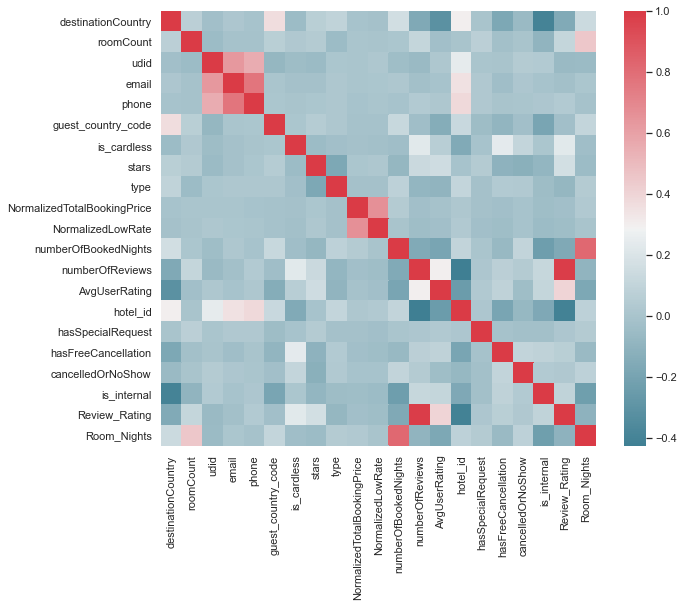

In [156]:
import seaborn as sns
sns.set()
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = new_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [162]:
new_df_feat = new_df[['is_cardless', 'numberOfBookedNights', 'hasFreeCancellation', 'Room_Nights']]
X_train1, X_test1, Y_train1, Y_test1 = sklearn.model_selection.train_test_split(new_df_feat, new_df['cancelledOrNoShow'],test_size=0.30, random_state=101)

In [163]:
rfc = RandomForestClassifier(n_estimators=5)
rfc.fit(X_train1, Y_train1)

RandomForestClassifier(n_estimators=5)

In [164]:
rfc_pred = rfc.predict(X_test1)
print(confusion_matrix(rfc_pred,Y_test1))
print(classification_report(rfc_pred,Y_test1))

[[818 371]
 [ 45  37]]
              precision    recall  f1-score   support

           0       0.95      0.69      0.80      1189
           1       0.09      0.45      0.15        82

    accuracy                           0.67      1271
   macro avg       0.52      0.57      0.47      1271
weighted avg       0.89      0.67      0.76      1271



In [165]:
new_df_feat = new_df[['hasSpecialRequest', 'numberOfBookedNights', 'hasFreeCancellation', 'Room_Nights']]
X_train1, X_test1, Y_train1, Y_test1 = sklearn.model_selection.train_test_split(new_df_feat, new_df['cancelledOrNoShow'],test_size=0.30, random_state=101)

In [166]:
rfc = RandomForestClassifier(n_estimators=5)
rfc.fit(X_train1, Y_train1)

RandomForestClassifier(n_estimators=5)

In [167]:
rfc_pred = rfc.predict(X_test1)
print(confusion_matrix(rfc_pred,Y_test1))
print(classification_report(rfc_pred,Y_test1))

[[803 358]
 [ 60  50]]
              precision    recall  f1-score   support

           0       0.93      0.69      0.79      1161
           1       0.12      0.45      0.19       110

    accuracy                           0.67      1271
   macro avg       0.53      0.57      0.49      1271
weighted avg       0.86      0.67      0.74      1271



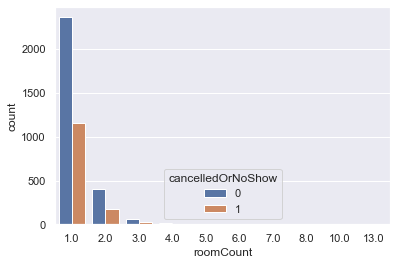

In [173]:
sns.countplot(x='roomCount', hue='cancelledOrNoShow', data=df)
plt.show()

In [175]:
property_type = df[['hotel_id', 'cancelledOrNoShow']].groupby(['hotel_id'], as_index=False).mean().sort_values(by='cancelledOrNoShow', ascending=True)
property_type[:30]

,hotel_id,cancelledOrNoShow
1739,1740,0.0
1294,1295,0.0
708,708,0.0
711,711,0.0
712,712,0.0
713,713,0.0
714,714,0.0
1292,1293,0.0
1290,1291,0.0
717,717,0.0


In [176]:
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE
from collections import Counter

ModuleNotFoundError: No module named 'imblearn'

In [181]:
import scikitlearn
!{sys.executable} -m pip3 install scikitlearn

ModuleNotFoundError: No module named 'scikitlearn'

ValueError: The python kernel does not appear to be a conda environment.  Please use ``%pip install`` instead.

In [182]:
import sys
!{sys.executable} -m pip install imblearn

     |████████████████████████████████| 206 kB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 7.2 MB 8.9 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


In [187]:
import sys
!{sys.executable} -m pip install imbalanced-learn

In [189]:
import sys
!{sys.executable} -m pip install delayed

     |████████████████████████████████| 72 kB 695 kB/s eta 0:00:011


ImportError: cannot import name 'delayed' from 'sklearn.utils.fixes' (/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/fixes.py)

In [1]:
import imblearn

In [2]:
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE
from collections import Counter

0.8.0


In [20]:
X_train, X_Test, Y_train, Y_test = sklearn.model_selection.train_test_split(x_scaled, y1, random_state=0)

NameError: name 'x_scaled' is not defined

In [42]:
oversample = SMOTE()
X_train, Y_train = oversample.fit_resample(X_train, Y_train)
counter = Counter(Y_train)
print(counter)

Counter({0: 1992, 1: 1992})


In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dtree = DecisionTreeClassifier()

In [48]:
print(classification_report(Y_test,rfc_pred))

NameError: name 'rfc_pred' is not defined

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df_feat_all, np.ravel(df_target), test_size=0.30, random_state=101)

In [55]:
rfc_pred = rfc.predict(X_test)

In [56]:
print(classification_report(y_test,predictions))

NameError: name 'predictions' is not defined